# Data Analytics Assignment 1

Imports

In [70]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Extracting data

In [71]:
def read_csv(filename):
    return pd.read_csv(filename)

df = read_csv('../dataset.csv')
df

,ID,Possession Status,Availability Starts From,Floor No,Commercial,Developer,Approved Authority Name,Units Available,Price,Price (English),...,Rentable CommuniPfty Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden,Possession By,NRI Pref,Land Area / Covered Area,Land Area Unit,Pantry Type
0,12685,Under Construction,Dec '25,5,N,NaN,KDMC,1.0,3150000.0,31.5 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
1,12684,Ready to Move,NaN,20,Y,TATA Housing Development Company Ltd.,TMC,10.0,6300000.0,63 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
2,12683,Ready to Move,NaN,18,N,Sai Satyam Developers,KDMC,0.0,5400000.0,54 Lac,...,1,1,1,1,1,NaN,Y,NaN,NaN,NaN
3,12682,Under Construction,Dec '25,5,N,Birla Estates,KDMC,70.0,9000000.0,90 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
4,12681,Under Construction,Dec '24,8,Y,Godrej Properties,NaN,NaN,4950000.0,49.5 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12680,5,Dec '26,Dec '26,NaN,Y,Kalpataru Ltd.,NaN,NaN,22200000.0,2.22 Cr,...,0,0,0,0,0,Dec '26,NaN,NaN,NaN,NaN
12681,4,Under Construction,Mar '26,10,N,Kalpataru Ltd.,MCGM,20.0,31000000.0,3.10 Cr,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
12682,3,Under Construction,Mar '26,5,N,Kalpataru Ltd.,MMRDA,7.0,18500000.0,1.85 Cr,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
12683,2,Ready to Move,NaN,1,Y,NaN,MCGM,0.0,22000000.0,2.20 Cr,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN


### Cleaning/Preprocessing

#### Homogenising Carpet Area

As it can be seen below, while most of the carpet area is in `sq-ft`, there are some other units as well. So, we are converting those with the alternate units so that all are in `sq-ft`.

In [72]:

conversion_factors = {
    'Sq-ft': 1,
    'nan': np.nan,
    'Bigha': 27000, 
    'Hectare': 107639,
    'Acre': 43560,
    'Sq-m': 10.7639,
    'Sq-yrd': 9
}

df['Unit of Carpet Area']=df['Unit of Carpet Area'].fillna(df['Carpet Area Unit'])
df['Carpet Area Unit'] = df['Carpet Area Unit'].fillna('Sq-ft')
df['Unit of Carpet Area'] = df['Unit of Carpet Area'].fillna('Sq-ft')
df['covArea Unit'] = df['covArea Unit'].fillna('Sq-ft')
df['Carpet Area'] = df.apply(lambda row: row['Carpet Area'] * conversion_factors.get(row['Unit of Carpet Area'], np.nan), axis=1)

df


,ID,Possession Status,Availability Starts From,Floor No,Commercial,Developer,Approved Authority Name,Units Available,Price,Price (English),...,Rentable CommuniPfty Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden,Possession By,NRI Pref,Land Area / Covered Area,Land Area Unit,Pantry Type
0,12685,Under Construction,Dec '25,5,N,NaN,KDMC,1.0,3150000.0,31.5 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
1,12684,Ready to Move,NaN,20,Y,TATA Housing Development Company Ltd.,TMC,10.0,6300000.0,63 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
2,12683,Ready to Move,NaN,18,N,Sai Satyam Developers,KDMC,0.0,5400000.0,54 Lac,...,1,1,1,1,1,NaN,Y,NaN,NaN,NaN
3,12682,Under Construction,Dec '25,5,N,Birla Estates,KDMC,70.0,9000000.0,90 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
4,12681,Under Construction,Dec '24,8,Y,Godrej Properties,NaN,NaN,4950000.0,49.5 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12680,5,Dec '26,Dec '26,NaN,Y,Kalpataru Ltd.,NaN,NaN,22200000.0,2.22 Cr,...,0,0,0,0,0,Dec '26,NaN,NaN,NaN,NaN
12681,4,Under Construction,Mar '26,10,N,Kalpataru Ltd.,MCGM,20.0,31000000.0,3.10 Cr,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
12682,3,Under Construction,Mar '26,5,N,Kalpataru Ltd.,MMRDA,7.0,18500000.0,1.85 Cr,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
12683,2,Ready to Move,NaN,1,Y,NaN,MCGM,0.0,22000000.0,2.20 Cr,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN


#### Handling missing values

- For numerical columns, we replace nan values with the median
- For non-numerical columns (with some exceptions based on manual evaluation), we replace nan values with the mode

In [73]:
numeric_df = df.select_dtypes(include='number')
medians = numeric_df.median()
df[numeric_df.columns] = df[numeric_df.columns].fillna(medians)


In [74]:

no_nan = []
nan_numeric = []
nan_non_numeric = []

for column in df.columns:
    if df[column].isnull().sum() == 0:
        no_nan.append(column)
    elif df[column].dtype == 'float64':
        nan_numeric.append(column)
    else:
        nan_non_numeric.append(column)

print(no_nan)
print(nan_numeric)
print(nan_non_numeric)

['ID', 'Commercial', 'Units Available', 'Price', 'Price (English)', 'Maintenance Charges', 'Booking Amount', 'Covered Area', 'sqft Price ', 'Carpet Area', 'Area Name', 'Unit of Carpet Area', 'Society', 'Bathroom', 'Transaction Type', 'Type of Property', 'City', 'bedroom', 'Data Referred From', 'floors', 'Luxury Flat', 'Carpet Area Unit', 'isPrimeLocationProperty', 'Tenants Preference', 'covArea Unit', 'isLuxuryServiceProvided', 'balconies', 'Power Back Up', 'Lift', 'Rain Water Harvesting', 'Club House', 'Swimming Pool', 'Gymnasium', 'Park', 'Parking', 'Security', 'Water Storage', 'Private Terrace/Garden', 'Vaastu Compliant', 'Service/Goods Lift', 'Air Conditioned', 'Visitor Parking', 'Intercom Facility', 'Maintenance Staff', 'Waste Disposal', 'Laundry Service', 'Internet/Wi-Fi Connectivity', 'DTH Television Facility', 'RO Water System', 'Banquet Hall', 'Bar/Lounge', 'Cafeteria/Food Court', 'Conference Room', 'Piped Gas', 'Jogging and Strolling Track', 'Outdoor Tennis Courts', 'Mansion'

In [75]:
for column in nan_non_numeric:
    if column not in ['Developer', 'Project Name', 'Landmark']:
        df[column] = df[column].fillna(df[column].mode()[0])

nan_columns = df.columns[df.isnull().any()]
len(nan_columns)

3

Note: None of the binary columns have nan values. So, we are not taking care of those separately

### Task 1

As investors have diverse budget limits, split the overall opportunities into three different price ranges. Analyze the distribution of these price ranges across cities.

For this task, we split the data into equal thirds based on their price. The low budget threshold was 0 to 33%, medium budget threshold is 33% to 66% and the remaining were considered to be high budget properties.

In [76]:
low_threshold = df['Price'].quantile(0.33)
medium_threshold = df['Price'].quantile(0.66)

bins = [0, low_threshold, medium_threshold, df['Price'].max()]
labels = ['Low', 'Medium', 'High']

price_range = pd.cut(df['Price'], bins=bins, labels=labels, include_lowest=True)

grouped_data=df.groupby(['City',price_range]).size().unstack()
grouped_data

Price,Low,Medium,High
City,,,
Agartala,1,0,0
Bhiwandi,2,0,0
Gurgaon,1,0,0
Hyderabad,8,0,0
Kalyan,7,2,0
Mumbai,2064,2598,3880
Nagpur,5,2,0
Palghar,2,0,0
Thane,2114,1570,429



Note: Many of the graph uses a logarithmic scale for the y-axis (number of listings) as there seems to be a large disparity in the number of listings between cities. This helps the graphs have better readability.

Stacked Bar Graph

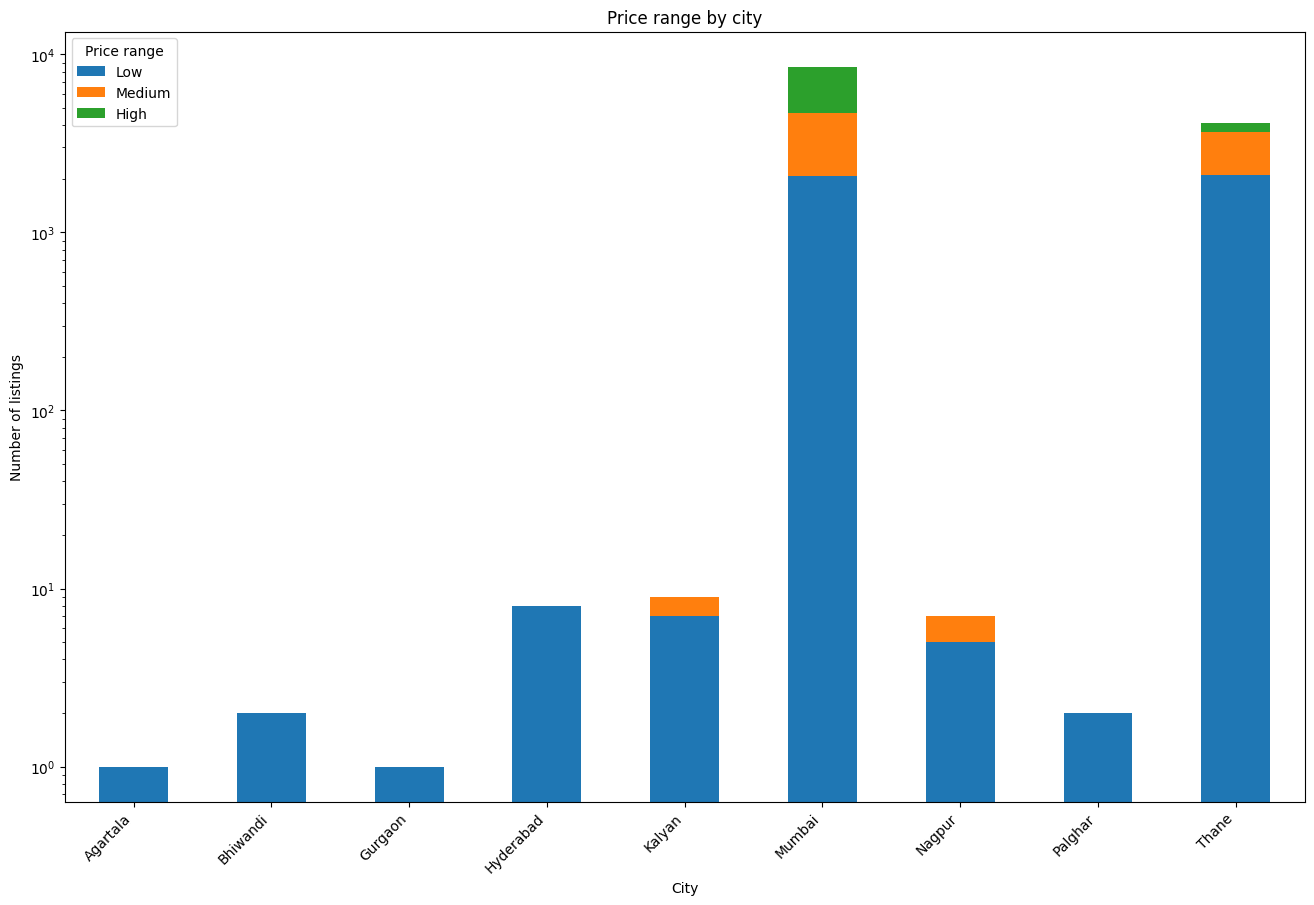

In [77]:
grouped_data.plot(kind='bar', stacked=True, figsize=(16, 10))
plt.title('Price range by city')
plt.yscale('log')
plt.xlabel('City')
plt.ylabel('Number of listings')
plt.legend(title='Price range')
plt.xticks(rotation=45, ha='right')
plt.show()


Analysis:

- Mumbai and Thane are the only cities with substantial numbers of listings across all three price ranges (low, medium, high).
- Most cities primarily have listings in the low price range, with few or no listings in the medium and high ranges.
- Mumbai has the highest number of listings overall, significantly more than any other city shown.
- Smaller cities like Agartala, Bhiwandi, and Gurgaon have very few listings, all in the low price range.

Box Plot

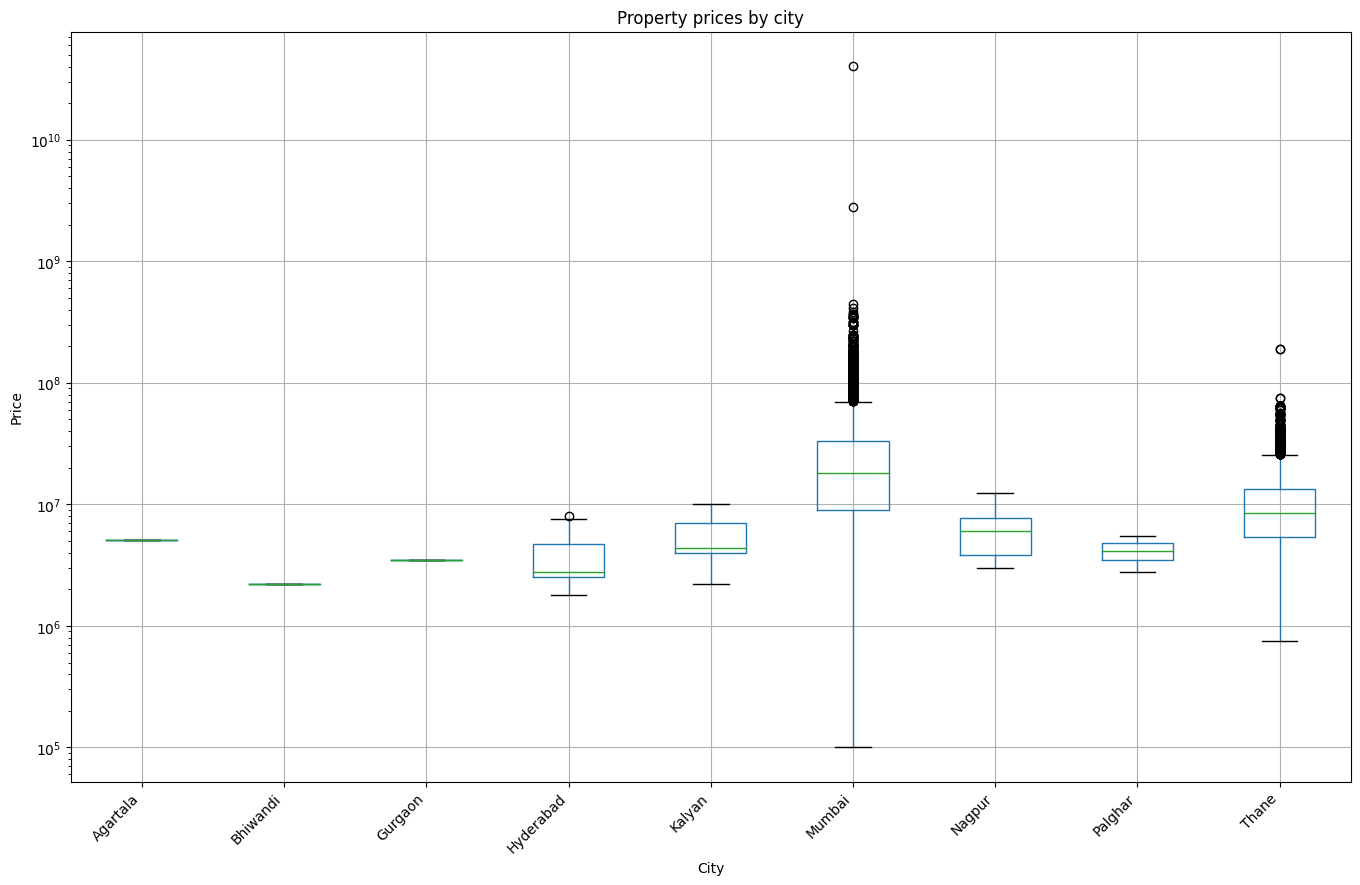

In [78]:
df.boxplot(column='Price', by='City', figsize=(16, 10))
plt.title('Property prices by city')
plt.suptitle('')
plt.xlabel('City')
plt.ylabel('Price')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.show()


Analysis:

- Mumbai stands out with the highest median price and the widest range of prices. It also has the most extreme outliers, with some properties priced significantly higher than in any other city.
- Cities like Mumbai and Thane show high variability in prices, indicated by their large box sizes and long whiskers. This suggests diverse property markets with options at various price points.
- The median price (represented by the line inside each box) varies significantly across cities, with Mumbai being the highest and cities like Agartala and Bhiwandi being the lowest.
-  Most cities have some outliers (represented by dots above the whiskers), but Mumbai has the most extreme ones, as mentioned before.


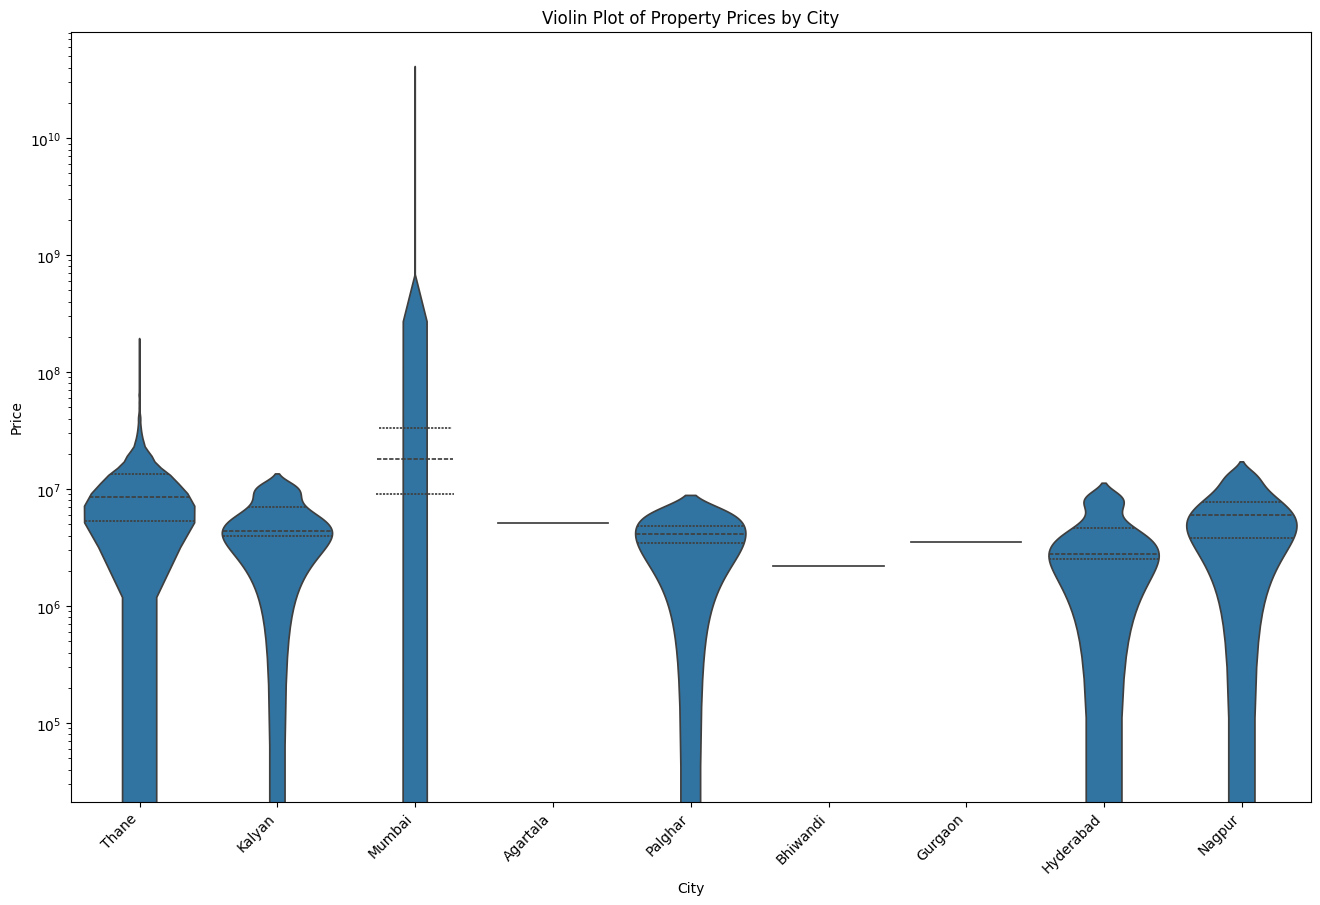

In [79]:
plt.figure(figsize=(16, 10))
sns.violinplot(x='City', y='Price', data=df, scale='width', inner='quartile')
plt.title('Violin Plot of Property Prices by City')
plt.xlabel('City')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.show()


### Task 2

Provide investors with a high-level summary of the whole data using the price range dimensions. Consider factors like `Type of Property`, `City`, and key amenities. What method/tool would you use to present this information effectively?

Heatmap

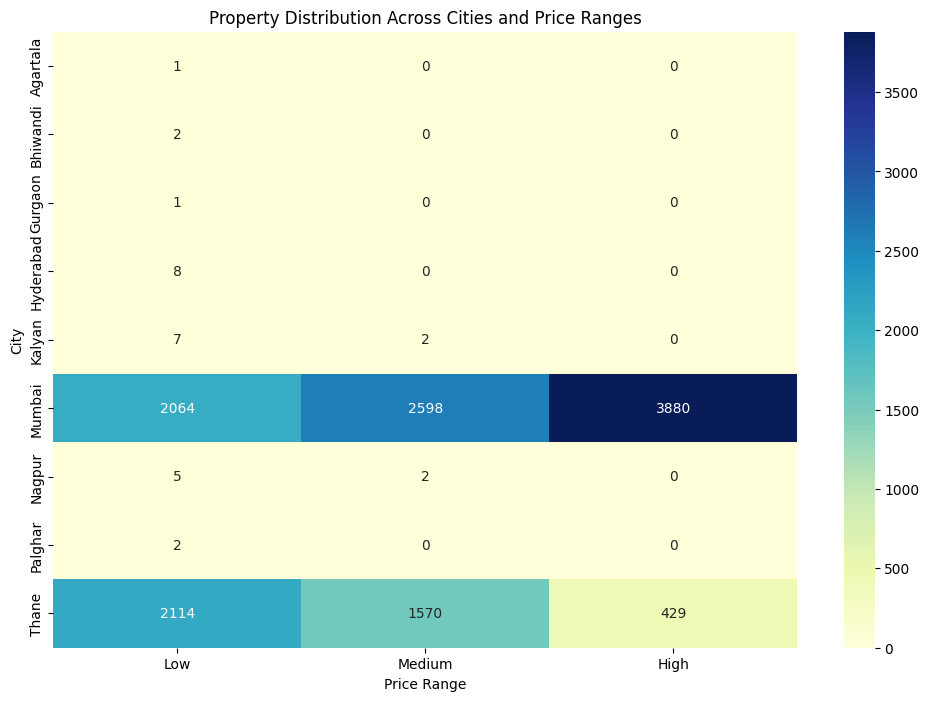

In [80]:
price_range_city = pd.crosstab(df['City'],price_range)

plt.figure(figsize=(12, 8))
sns.heatmap(price_range_city, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Property Distribution Across Cities and Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('City')
plt.show()

Analysis:

- Mumbai has by far the highest number of properties across all price ranges, with a significant presence in low (2064), medium (2598), and high (3880) price categories. This indicates a large, diverse real estate market.

- Thane is the second most prominent market, with substantial numbers in low (2114) and medium (1570) ranges, and a notable presence in the high range (429).

- Most cities, except Mumbai and Thane, have zero or very few properties in the high price range.

- Cities like Agartala, Bhiwandi, and Gurgaon have very few properties, all in the low price range, suggesting smaller or less developed real estate markets.

- Most cities have few or no properties in the medium price range, with only Mumbai, Thane, Kalyan, and Nagpur showing any presence.

- Data Intensity: The color coding indicates the intensity of data, with darker colors representing higher numbers of properties.



In [81]:
df['Price Range'] = price_range
df['Amenities Facing']

0                   Garden/Park, Pool
1                           Main Road
2              Garden/Park, Main Road
3        Pool, Garden/Park, Main Road
4                         Garden/Park
                     ...             
12680                       Main Road
12681    Garden/Park, Pool, Main Road
12682                     Garden/Park
12683                       Main Road
12684                       Main Road
Name: Amenities Facing, Length: 12685, dtype: object

Stacked histogram

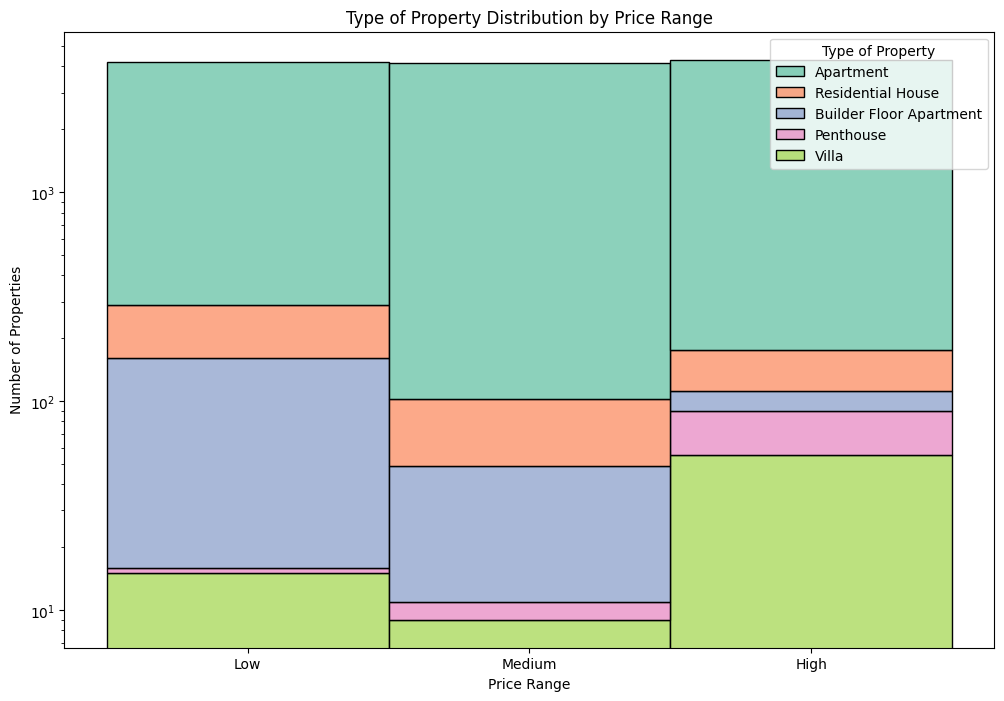

In [82]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Price Range', hue='Type of Property', multiple='stack', palette='Set2')
plt.title('Type of Property Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Properties')
plt.yscale('log')
plt.show()

Analysis:

This graph shows the distribution of different types of properties across three price ranges: Low, Medium, and High.
- Apartments are the most common type of property across all price ranges, with their number decreasing as the price range increases.
- Builder floor apartments are prevalent in low and medium price ranges but less common in the high price range.
- Villas are present in all price ranges, but their proportion increases significantly in the high price range.
- The diversity of property types increases in the higher price ranges, with all five types represented in the "High" category.
- Luxury properties like penthouses and villas make up a larger share of the high-priced market compared to lower price ranges.

Grouped bar graph

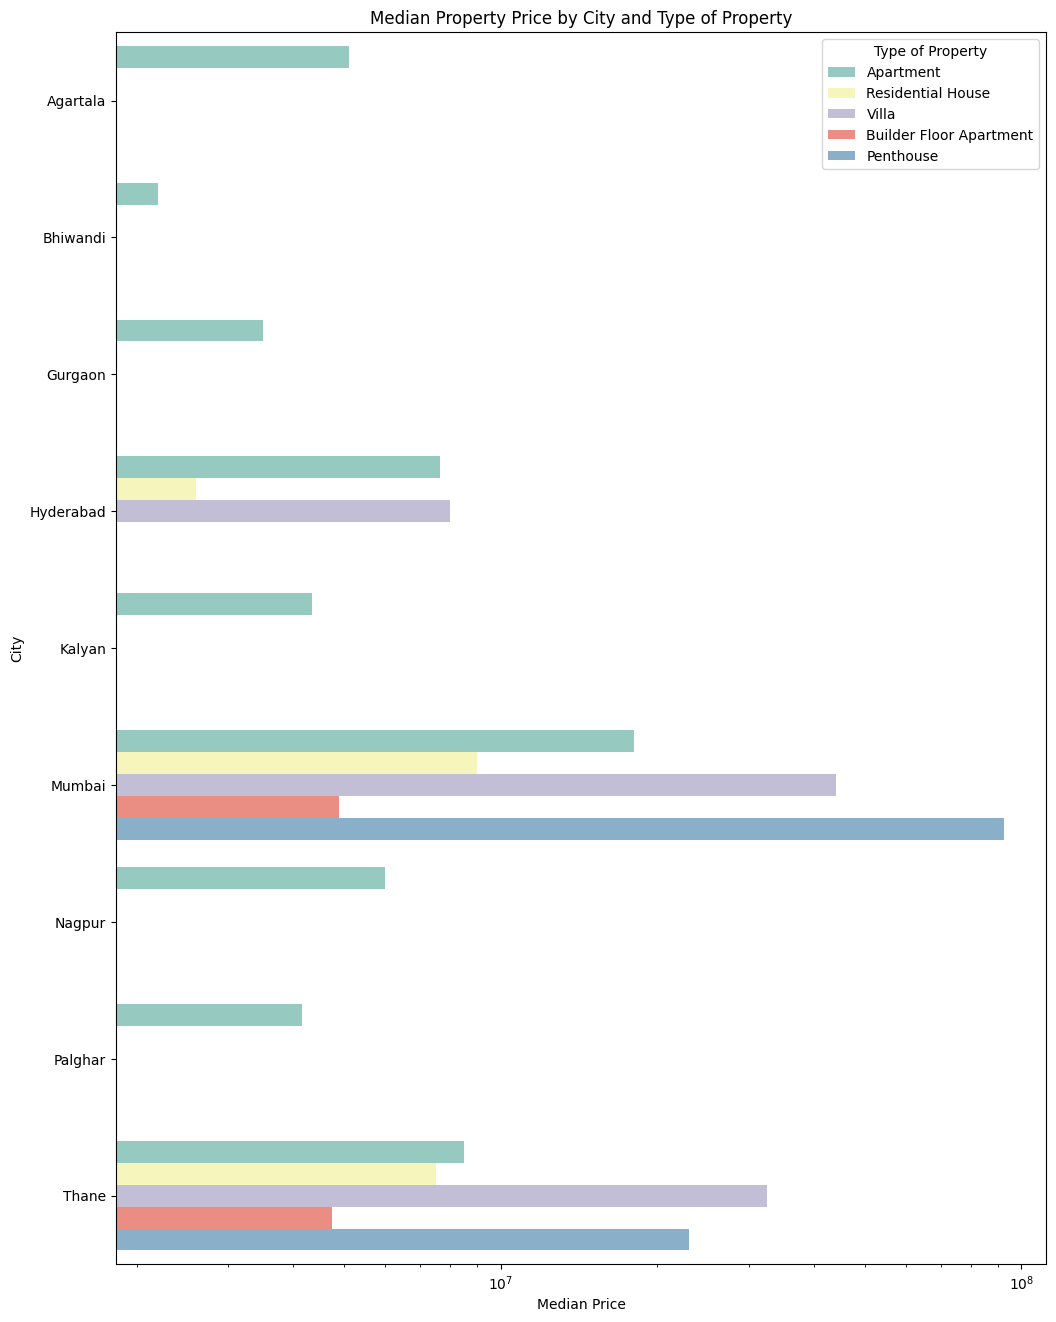

In [83]:
median_price_by_city_type = df.groupby(['City', 'Type of Property'])['Price'].median().reset_index()

plt.figure(figsize=(12, 16))
sns.barplot(x='Price', y='City', hue='Type of Property', data=median_price_by_city_type, palette='Set3')
plt.title('Median Property Price by City and Type of Property')
plt.xlabel('Median Price')
plt.ylabel('City')
plt.xscale('log')
plt.show()

Analysis:

- Mumbai has the highest median property prices across all types, significantly higher than other cities.
- Penthouses in Mumbai are the most expensive property type overall and apartments are the most common property type, available in all cities shown.
- There's significant variation in property prices between cities. For example, apartments in Bhiwandi are much cheaper than those in Mumbai or Hyderabad.
- Not all property types are available or represented in every city. For instance, only Mumbai and Thane show data for all five property types.


High-Level Summary

In [84]:

from tabulate import tabulate

summary_stats = {
    'Metric': [
        'Average Price',
        'Median Price',
        'Price Range Spread',
        'Standard Deviation of Prices',
        'City with Highest Median Price',
        'City with Lowest Median Price',
        'City with Most Listings',
        'Most Common Type of Property',
        'Type of Property with Highest Average Price',
        'Type of Property with Lowest Average Price',
        'Percentage of Properties with Gymnasium',
        'Percentage of Properties with Swimming Pool',
        'Properties with Both Gymnasium and Swimming Pool',
        'Top 3 Cities for Affordable Investments',
        'Top 3 Cities for Luxury Investments',
        'Cities with the Most Diverse Price Ranges',
    ],
    'Value': [
        df['Price'].mean(),
        df['Price'].median(),
        df['Price'].max() - df['Price'].min(),
        df['Price'].std(),
        df.groupby('City')['Price'].median().idxmax(),
        df.groupby('City')['Price'].median().idxmin(),
        df['City'].value_counts().idxmax(),
        df['Type of Property'].mode()[0],
        df.groupby('Type of Property')['Price'].mean().idxmax(),
        df.groupby('Type of Property')['Price'].mean().idxmin(),
        f"{df['Gymnasium'].mean() * 100:.2f}%",
        f"{df['Swimming Pool'].mean() * 100:.2f}%",
        ((df['Gymnasium'] == 1) & (df['Swimming Pool'] == 1)).sum(),
        ', '.join(df[df['Price Range'] == 'Low']['City'].value_counts().nlargest(3).index),
        ', '.join(df[df['Price Range'] == 'High']['City'].value_counts().nlargest(3).index),
        ', '.join(df.groupby('City')['Price Range'].nunique().nlargest(3).index),
    ]
}

table = tabulate(summary_stats, headers='keys', tablefmt='fancy_grid')
print(table)


╒══════════════════════════════════════════════════╤══════════════════════════╕
│ Metric                                           │ Value                    │
╞══════════════════════════════════════════════════╪══════════════════════════╡
│ Average Price                                    │ 26317173.44824596        │
├──────────────────────────────────────────────────┼──────────────────────────┤
│ Median Price                                     │ 13500000.0               │
├──────────────────────────────────────────────────┼──────────────────────────┤
│ Price Range Spread                               │ 40799900001.0            │
├──────────────────────────────────────────────────┼──────────────────────────┤
│ Standard Deviation of Prices                     │ 364154507.66538703       │
├──────────────────────────────────────────────────┼──────────────────────────┤
│ City with Highest Median Price                   │ Mumbai                   │
├───────────────────────────────────────

Bubble plot

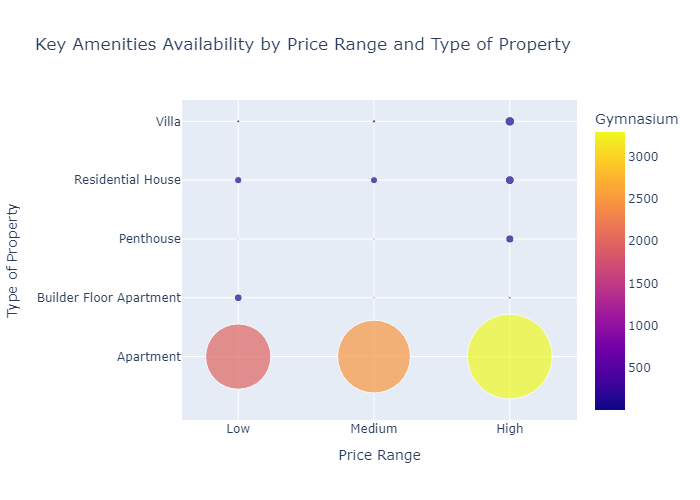

In [85]:

import plotly.express as px

amenities_data = df.groupby(['Price Range', 'Type of Property']).sum().reset_index()

fig = px.scatter(amenities_data, x='Price Range', y='Type of Property',
                 size='Swimming Pool', color='Gymnasium', hover_name='Type of Property',
                 size_max=60, title='Key Amenities Availability by Price Range and Type of Property')
fig.show(renderer='png')


Analysis:

a) Apartments:
- Available across all price ranges (Low, Medium, High).
- The circles are largest, suggesting apartments are most likely to have swimming pools.
- The color changes from red to orange to yellow as price increases, indicating more gyms in higher-priced apartments.

b) Other property types:

- Represented by small purple dots, suggesting less likelihood of pools and gyms compared to apartments.
- Builder Floor Apartment only appears in the Low price range.
- Penthouse only appears in the High price range.

c) Amenity trends:

- Swimming pools and gyms are most common in apartments.
- Higher-priced properties generally have more amenities (larger, yellower circles for high-priced apartments).

### Task 3

Some investors want to compare investment opportunities in Thane and Mumbai. Analyze and visualize the differences in property types, sizes (using Carpet Area), and prices between these two cities.

Grouped bar graph

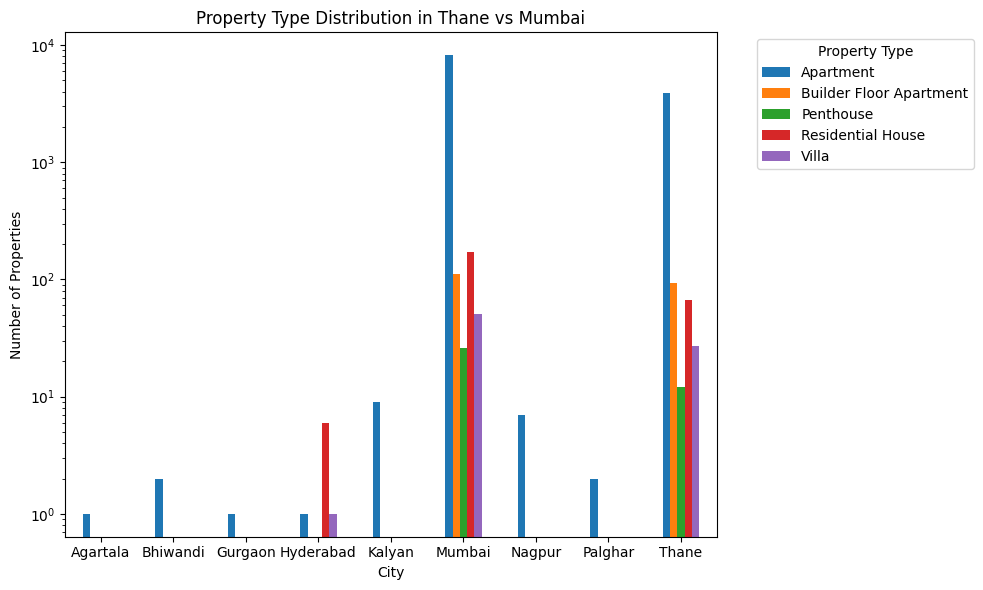

In [86]:
thane_mumbai_data = df[df['City'].isin(['Thane', 'Mumbai'])]
property_type_dist = df.groupby(['City', 'Type of Property']).size().unstack()

property_type_dist.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Property Type Distribution in Thane vs Mumbai')
plt.ylabel('Number of Properties')
plt.yscale('log')
plt.xlabel('City')
plt.grid(False)
plt.xticks(rotation=0)
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Analysis:

- In both cities, apartments are by far the most common property type
- The bars for Mumbai are generally taller than those for Thane across most property types, indicating a larger real estate market.
- The distribution of property types follows a similar pattern in both cities, with apartments being most common, followed by residential houses and builder floor apartments.
- Penthouses and villas are the least common property types in both cities, likely representing the luxury end of the market.
- There appears to be a notably larger number of residential houses in Mumbai compared to Thane, suggesting a stronger market for standalone homes in Mumbai.

Grouped bar graph

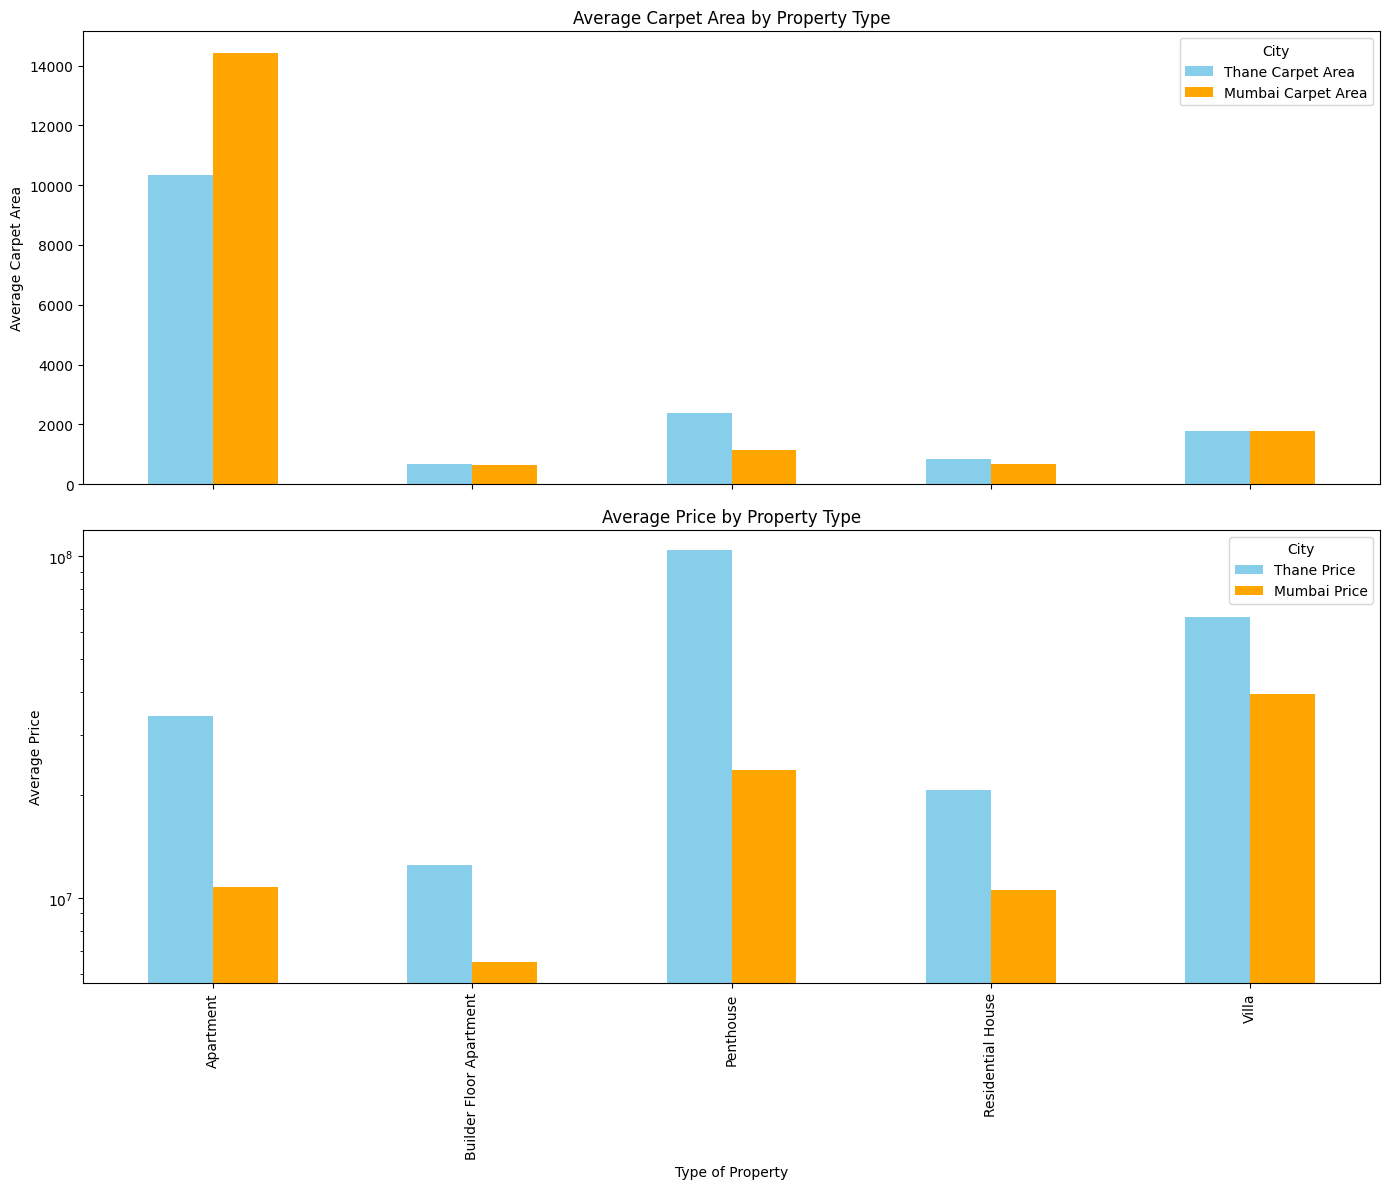

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

thane_mumbai_data = df[df['City'].isin(['Thane', 'Mumbai'])]

avg_values = thane_mumbai_data.groupby(['City', 'Type of Property']).agg({
    'Carpet Area': 'mean',
    'Price': 'mean'
}).unstack(level=0).reset_index()

avg_values.columns = ['Type of Property', 'Thane Carpet Area', 'Mumbai Carpet Area', 'Thane Price', 'Mumbai Price']

fig, axs = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

avg_values.plot(kind='bar', x='Type of Property', y=['Thane Carpet Area', 'Mumbai Carpet Area'], ax=axs[0], color=['skyblue', 'orange'])
axs[0].set_title('Average Carpet Area by Property Type')
axs[0].set_ylabel('Average Carpet Area')
axs[0].legend(title='City')

avg_values.plot(kind='bar', x='Type of Property', y=['Thane Price', 'Mumbai Price'], ax=axs[1], color=['skyblue', 'orange'])
axs[1].set_title('Average Price by Property Type')
axs[1].set_ylabel('Average Price')
axs[1].set_yscale('log')
axs[1].legend(title='City')

plt.xlabel('Type of Property')
plt.tight_layout()
plt.show()


Analysis:

a) Carpet Area:
- Apartments have the largest average carpet area in both cities, with Mumbai's being significantly larger than Thane's.
- Penthouses in Thane have a larger average carpet area than those in Mumbai.
- Builder Floor Apartments, Residential Houses, and Villas have relatively similar carpet areas in both cities, with slight variations.

b) Price:
- Penthouses are the most expensive property type in both cities, with Thane's being significantly more expensive than Mumbai's.
- Villas are the second most expensive, again with Thane's being pricier.
- Apartments and Residential Houses show moderate prices, with Thane consistently more expensive than Mumbai.
- Builder Floor Apartments are the least expensive, with a notable price difference between Thane and Mumbai.

c) City Comparison:
- Thane generally has higher prices across all property types despite often having smaller carpet areas.
- Mumbai has larger carpet areas for apartments but lower prices compared to Thane.


### Task 4

Certain investors seek to compare investment opportunities in less expensive and more expensive localities within each city. For instance, compare the average Carpet Area of high-budget properties in prime locations (isPrimeLocationProperty) versus non-prime locations.

(within each city???)

In [91]:
df['City'].value_counts()

Mumbai       8542
Thane        4113
Kalyan          9
Hyderabad       8
Nagpur          7
Palghar         2
Bhiwandi        2
Agartala        1
Gurgaon         1
Name: City, dtype: int64

In [92]:

high_budget_threshold = df['Price'].quantile(0.75)
high_budget_data = df[df['Price'] >= high_budget_threshold]

low_budget_threshold = df['Price'].quantile(0.25)
low_budget_data = df[df['Price'] <= low_budget_threshold]

Grouped bar graphs

<Figure size 1200x600 with 0 Axes>

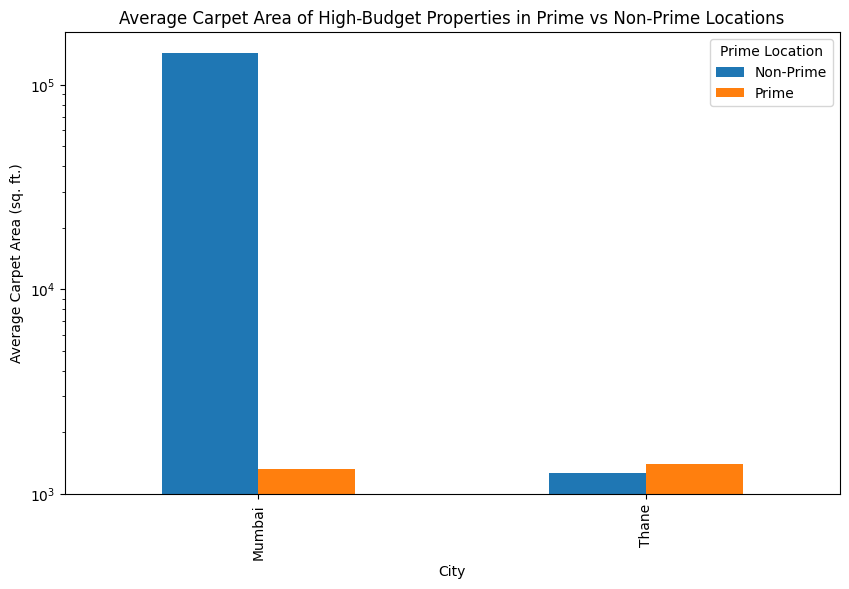

In [93]:
prime_vs_non_prime = high_budget_data.groupby(['City', 'isPrimeLocationProperty'])['Carpet Area'].mean().unstack()

plt.figure(figsize=(12, 6))

prime_vs_non_prime.plot(kind='bar', figsize=(10, 6))
plt.title('Average Carpet Area of High-Budget Properties in Prime vs Non-Prime Locations')
plt.ylabel('Average Carpet Area (sq. ft.)')
plt.xlabel('City')
plt.yscale('log')
plt.legend(title='Prime Location', labels=['Non-Prime', 'Prime'])
plt.show()

Analysis:

- In Mumbai, high-budget properties in non-prime locations have a much larger average carpet area compared to those in prime locations.
- In Thane, the average carpet area is quite similar for both prime and non-prime locations.

<Figure size 1200x600 with 0 Axes>

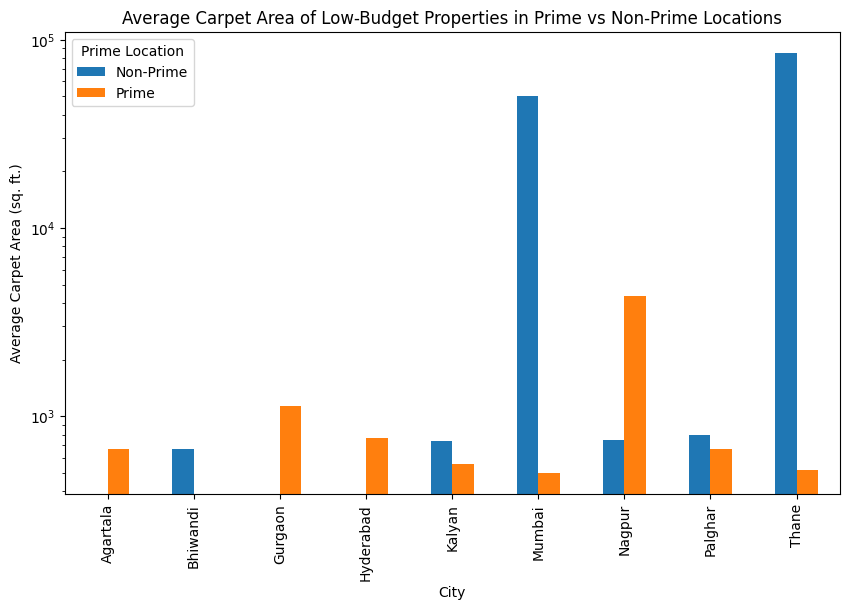

In [94]:
prime_vs_non_prime = low_budget_data.groupby(['City', 'isPrimeLocationProperty'])['Carpet Area'].mean().unstack()

plt.figure(figsize=(12, 6))

prime_vs_non_prime.plot(kind='bar', figsize=(10, 6))
plt.title('Average Carpet Area of Low-Budget Properties in Prime vs Non-Prime Locations')
plt.ylabel('Average Carpet Area (sq. ft.)')
plt.xlabel('City')
plt.yscale('log')
plt.legend(title='Prime Location', labels=['Non-Prime', 'Prime'])
plt.show()


Analysis:

- There's significant variation in carpet areas between cities, ranging from around 500-600 sq ft to over 10,000 sq ft.
- In cities like Mumbai, Thane, and Kalyan, non-prime locations offer much larger carpet areas. However, in cities like Nagpur and Gurgaon, prime locations offer larger carpet areas.
- Mumbai shows the most extreme difference, with non-prime locations offering dramatically larger spaces than prime locations.
- Not all cities have data for both prime and non-prime locations (e.g., Agartala, Bhiwandi).


### Task 5

Some investors prefer larger area properties with relatively lower budgets. Identify and visualize properties that offer the best value in terms of Carpet Area per unit of Price across different cities

Bar graphs

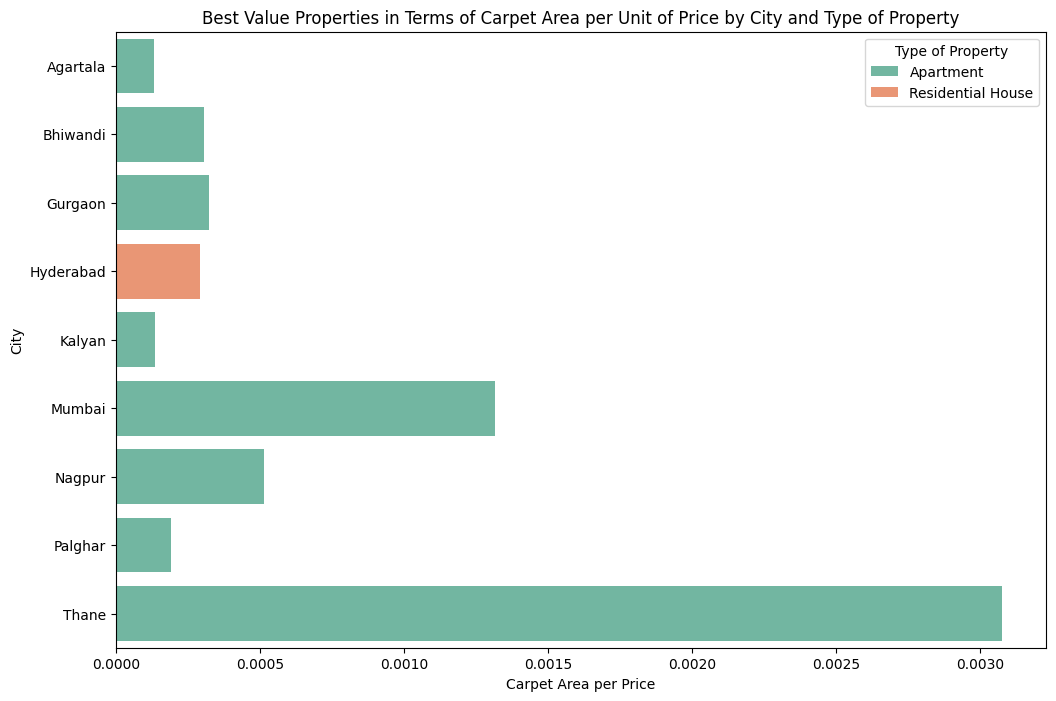

In [95]:
df_copy = df.copy()

df_copy.dropna(subset=['Carpet Area'], inplace=True)

df_copy['Carpet Area per Price'] = df_copy['Carpet Area'] / df_copy['Price']

city_property_group = df_copy.groupby(['City', 'Type of Property'])['Carpet Area per Price'].mean().reset_index()

best_value_properties = city_property_group.loc[city_property_group.groupby('City')['Carpet Area per Price'].idxmax()]

plt.figure(figsize=(12, 8))
sns.barplot(x='Carpet Area per Price', y='City', hue='Type of Property', data=best_value_properties, palette='Set2')
plt.title('Best Value Properties in Terms of Carpet Area per Unit of Price by City and Type of Property')
plt.xlabel('Carpet Area per Price')
plt.ylabel('City')
plt.show()


Analysis:

- Thane has the highest carpet area per unit of price for apartments, significantly higher than any other city.

- Mumbai surprisingly offers the second-best value for apartments in terms of carpet area per price.

- In most cities, apartments offer better value than residential houses. Only Hyderabad seems better for residential houses, and it's lower in value than apartment values for most cities.


Scatter plot

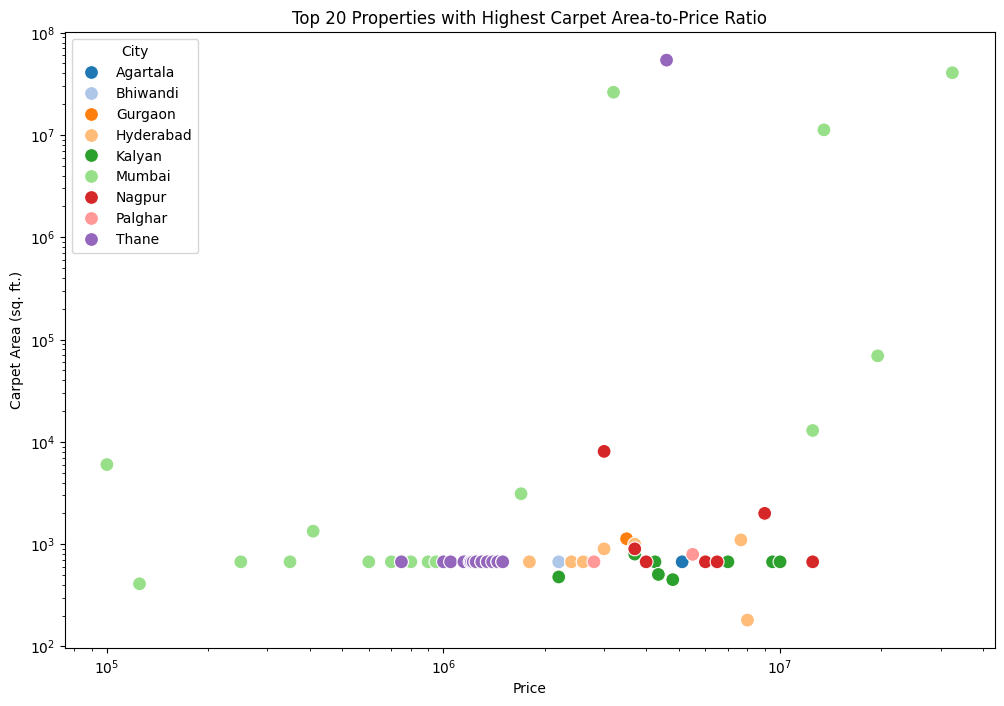

In [96]:

df['Area-to-Price Ratio'] = df['Carpet Area'] / df['Price']

top_20_each_city = (df.sort_values(by=['City', 'Area-to-Price Ratio'], ascending=[True, False]).groupby('City').head(20))

plt.figure(figsize=(12, 8))
sns.scatterplot(data=top_20_each_city, x='Price', y='Carpet Area', hue='City', palette='tab20', s=100)
plt.title('Top 20 Properties with Highest Carpet Area-to-Price Ratio')
plt.xlabel('Price')
plt.ylabel('Carpet Area (sq. ft.)')
plt.yscale('log')
plt.xscale('log')
plt.legend(title='City')
plt.show()


Analysis:

- Mumbai appears to have the most properties in this top 20 list, indicating it might offer good value in terms of carpet area for the price.

- There's a cluster of properties in the middle price range (around 1,000,000 to 10,000,000) with carpet areas between 500 and 1,000 square feet. Many cities are represented in this cluster.

- Thane (purple dots) has several properties clustered closely together, suggesting consistent pricing and sizing in that area.

- There are a few outliers with very high carpet areas (over 10,000,000 sq ft) at various price points, mostly from Mumbai. These could be large commercial properties or development projects.

- The relationship between price and carpet area is not strictly linear, indicating that factors other than size (such as location, amenities, etc.) play a significant role in determining property prices.

- Some cities like Nagpur and Kalyan seem to offer properties with good carpet area-to-price ratios in the mid-range of the price spectrum.

### Task 6

Some investors are interested in knowing the hotspots for their offices in Mumbai and Thane. Analyze commercial properties in these cities, considering factors like Price, Carpet Area, Amenities, and Location.

In [97]:
commercial_data = df[(df['City'].isin(['Mumbai', 'Thane'])) & (df['Commercial'] == 'Y')]

Violin plot

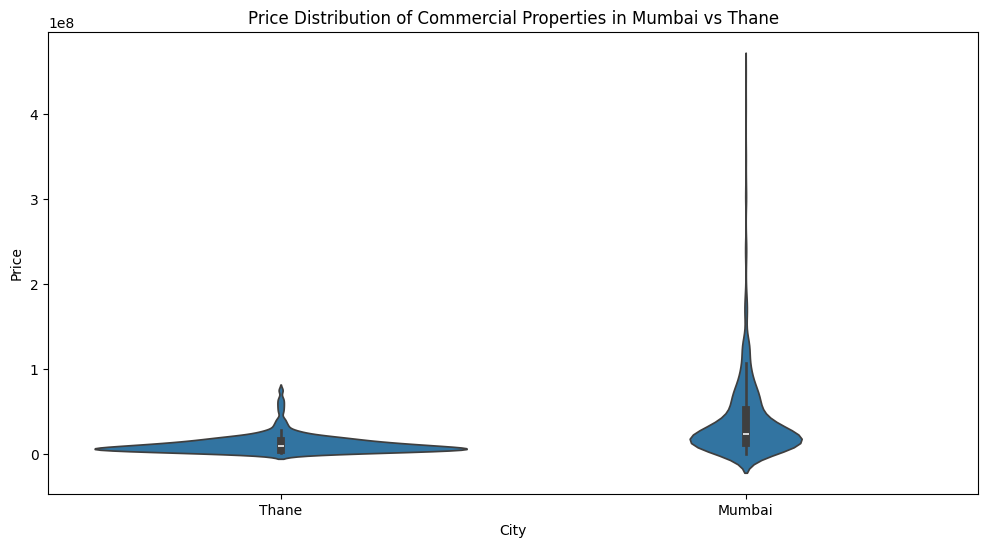

In [98]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='City', y='Price', data=commercial_data)
plt.title('Price Distribution of Commercial Properties in Mumbai vs Thane')
plt.ylabel('Price')
plt.xlabel('City')
plt.show()

Analysis:

- Mumbai generally has higher property prices than Thane. The plot for Mumbai extends much higher on the price axis.

- The median price (indicated by the white dot) for Mumbai properties appears to be higher than for Thane.

- Thane's distribution is relatively symmetric, with a slight upward skew. Mumbai's distribution is strongly right-skewed, with a long tail extending upwards. This indicates some extremely high-priced properties in Mumbai.

- Mumbai appears to have more extreme outliers on the high end, as shown by the extended thin part of its plot.


Scatter plot

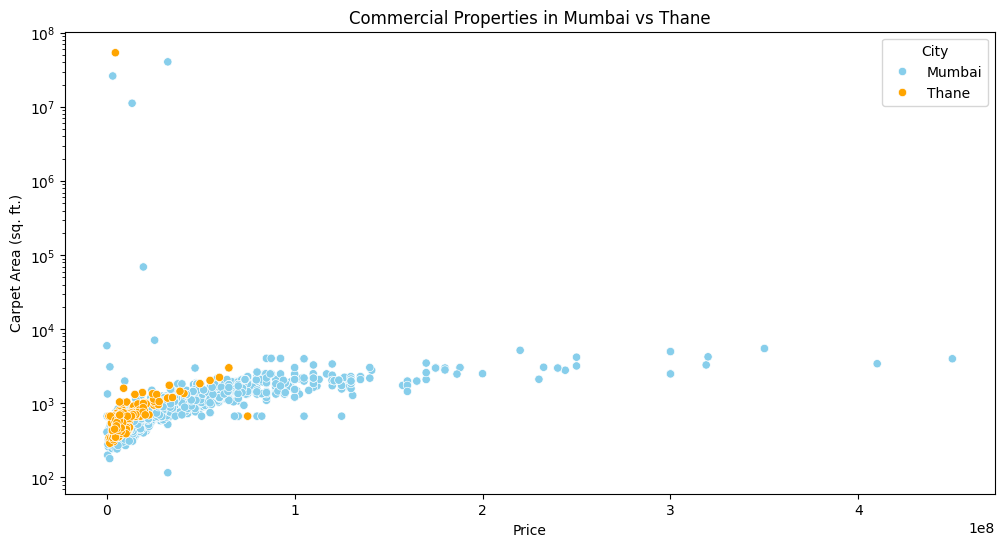

In [99]:

plt.figure(figsize=(12, 6))

ax = plt.gca()

custom_palette = {'Mumbai': 'skyblue', 'Thane': 'orange'}

sns.scatterplot(x='Price', y='Carpet Area', hue='City', palette=custom_palette, data=commercial_data[commercial_data['City'] == 'Mumbai'], ax=ax)
sns.scatterplot(x='Price', y='Carpet Area', hue='City', palette=custom_palette, data=commercial_data[commercial_data['City'] == 'Thane'], ax=ax)

plt.title('Commercial Properties in Mumbai vs Thane')
plt.ylabel('Carpet Area (sq. ft.)')
plt.xlabel('Price')
plt.yscale('log')

plt.show()

Analysis:

-  Properties in Mumbai generally have a wider price range while Thane properties are clustered at lower prices.

- Mumbai has properties with a much wider range of carpet areas, from very small to extremely large. Thane properties are more concentrated in the lower to mid-range of carpet areas.

- Mumbai has several notable outliers, particularly properties with very large carpet areas (above 10^6 sq. ft.) across various price points.


Histogram

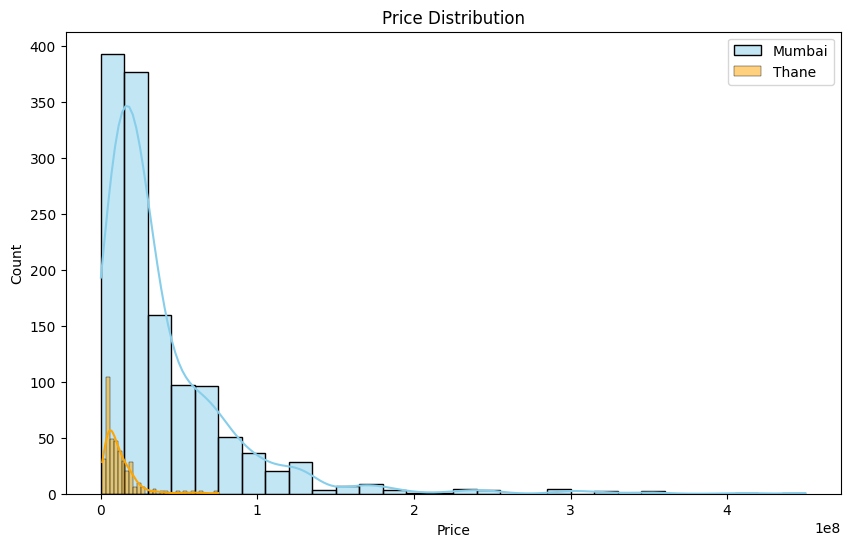

In [100]:
plt.figure(figsize=(10, 6))

sns.histplot(commercial_data[commercial_data['City'] == 'Mumbai']['Price'], bins=30, color='skyblue', label='Mumbai', kde=True)
sns.histplot(commercial_data[commercial_data['City'] == 'Thane']['Price'], bins=30, color='orange', label='Thane', kde=True)

plt.xlabel('Price')
plt.title('Price Distribution')
plt.legend()

plt.show()


Analysis:

- Both Mumbai and Thane show right-skewed distributions, with a high concentration of properties at lower prices and a long tail extending to higher prices.

- Mumbai's distribution extends further into higher price ranges compared to Thane. Thane's properties are more concentrated in the lower price ranges.


Group bar graph

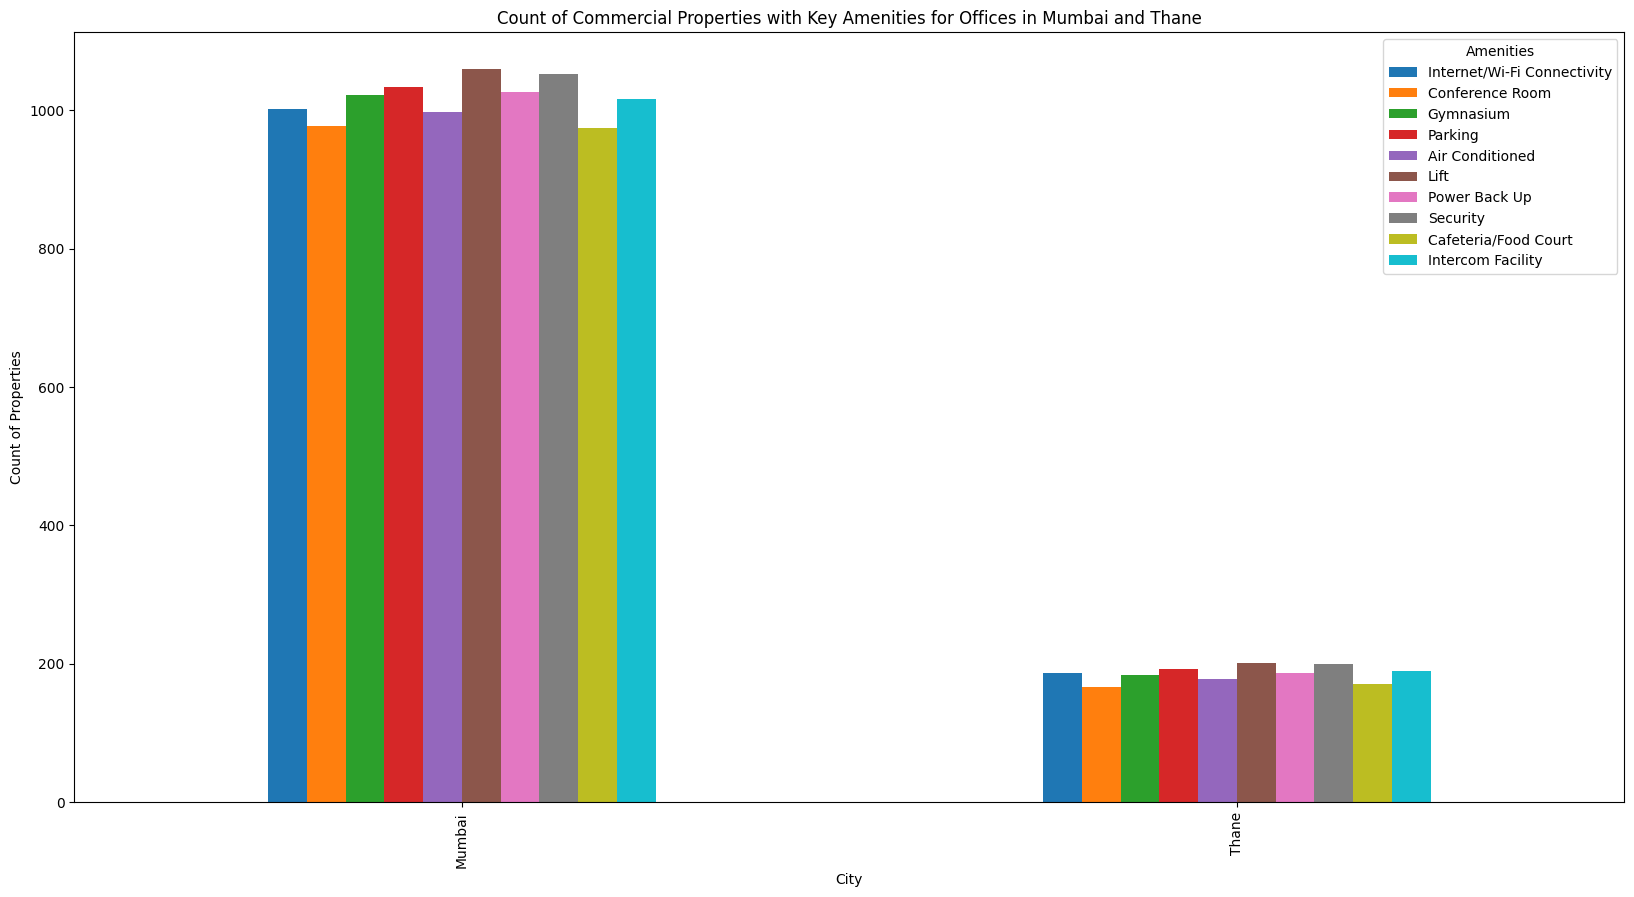

In [103]:
amenities = ['Internet/Wi-Fi Connectivity', 'Conference Room', 'Gymnasium', 'Parking', 'Air Conditioned', 'Lift', 'Power Back Up', 'Security', 'Cafeteria/Food Court', 'Intercom Facility']

amenities_summary = commercial_data.groupby('City')[amenities].sum()
amenities_summary.plot(kind='bar', figsize=(20, 10))
plt.title('Count of Commercial Properties with Key Amenities for Offices in Mumbai and Thane')
plt.ylabel('Count of Properties')
plt.xlabel('City')
plt.legend(title='Amenities')
plt.show()


Analysis:

- Mumbai has significantly more commercial properties with these amenities compared to Thane. The bars for Mumbai are much taller, indicating a higher count across all amenities.

- The amenities seem to be quite evenly distributed in both cities, with not much variation between the most and least common amenities.

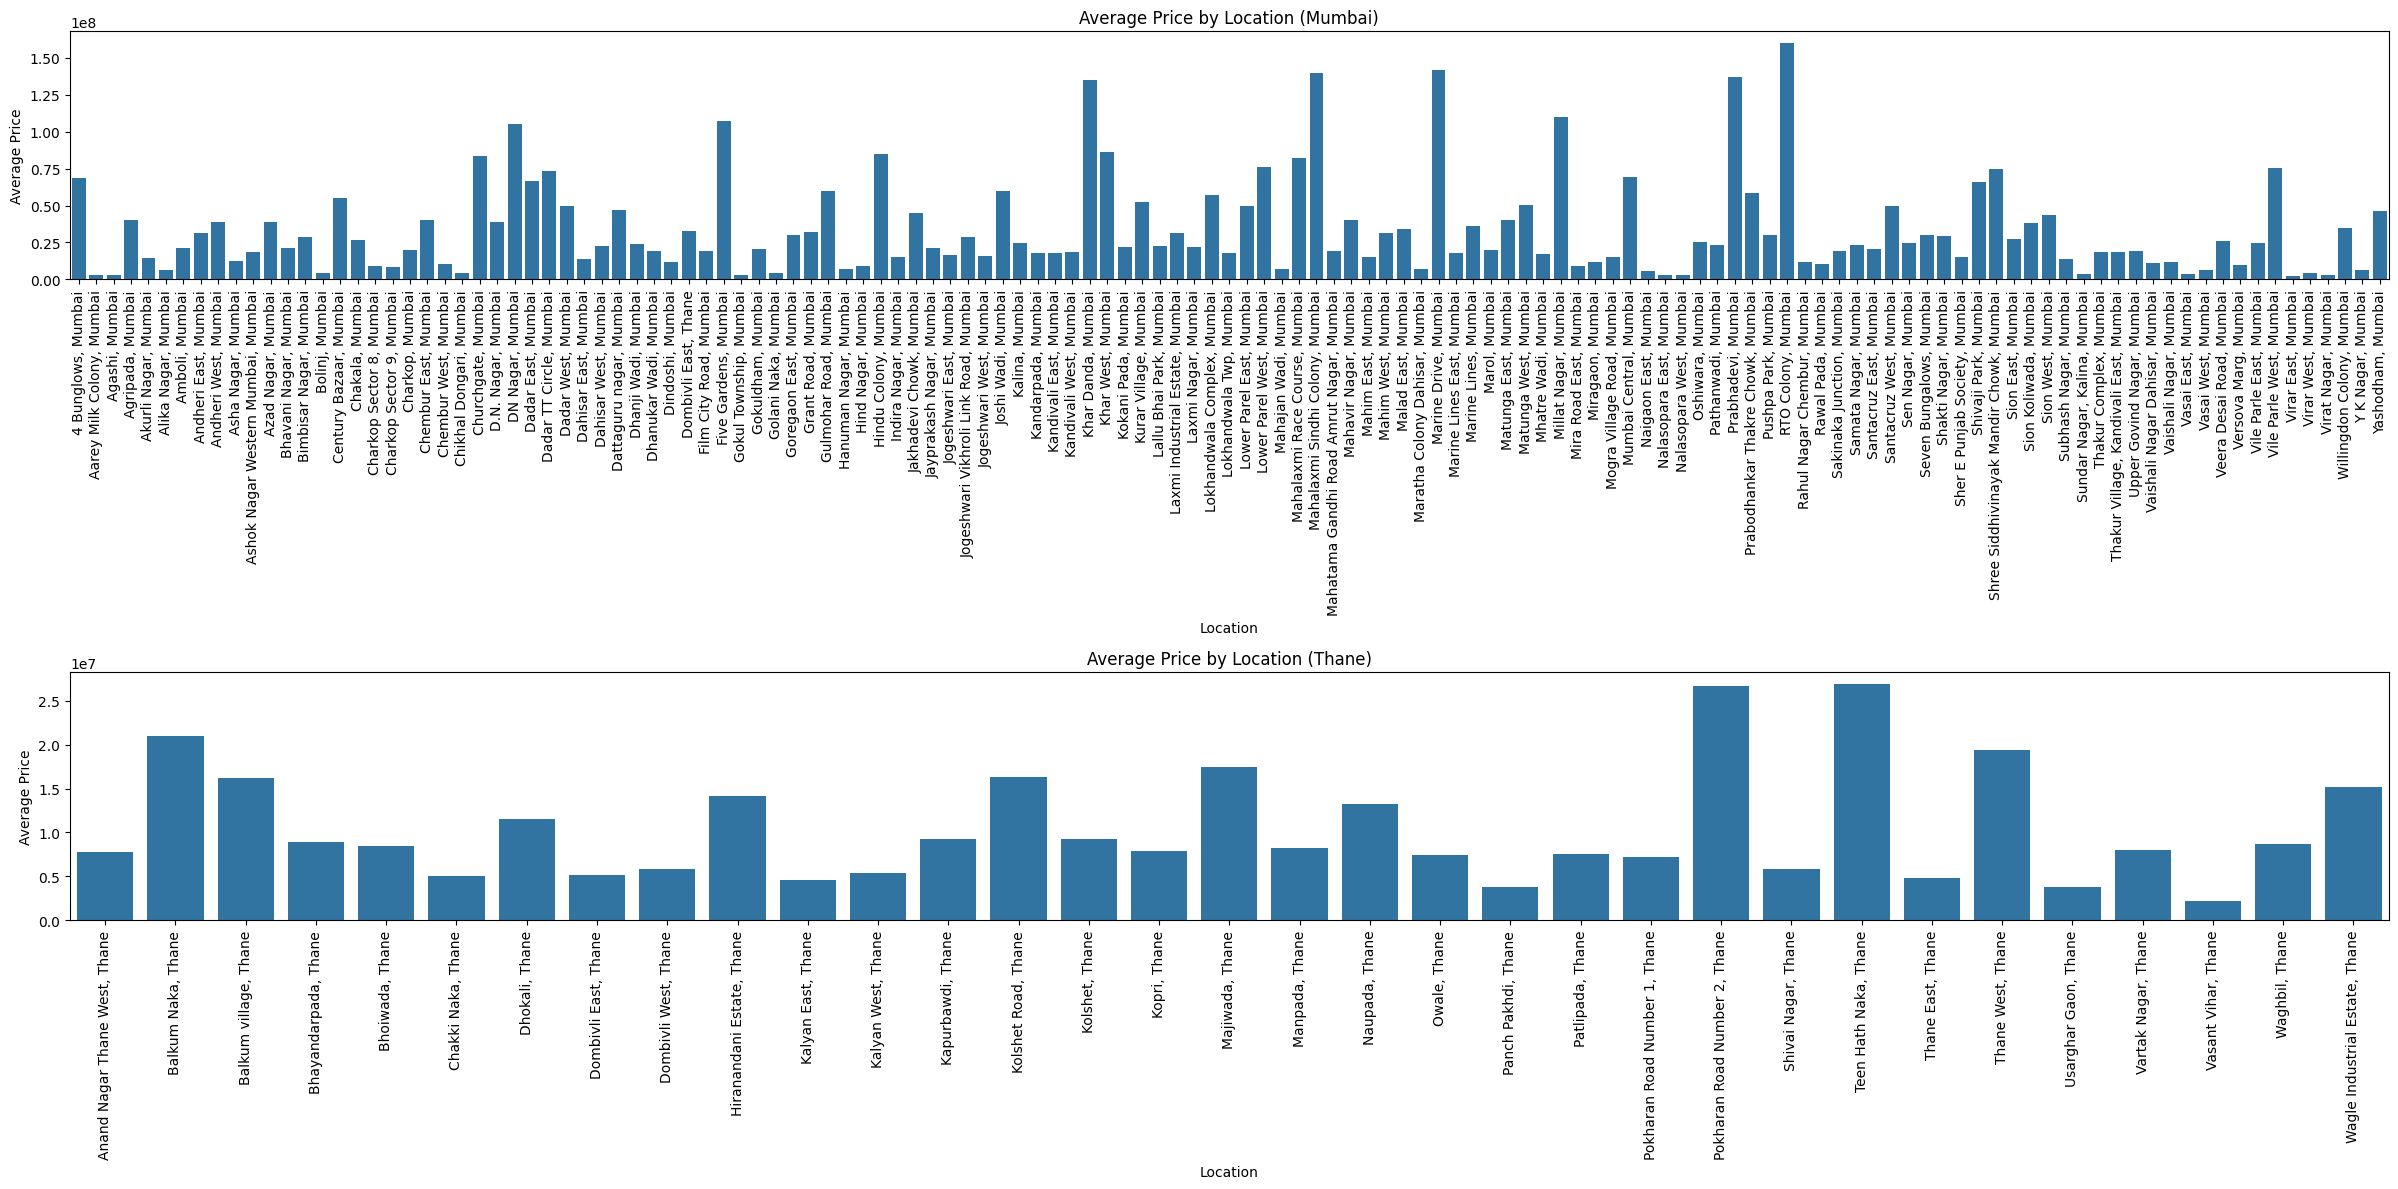

In [105]:
commercial_data['Location'] = commercial_data['Location'].astype(str)

data_mumbai = commercial_data[commercial_data['City'] == 'Mumbai']
data_thane = commercial_data[commercial_data['City'] == 'Thane']

avg_price_mumbai = data_mumbai.groupby('Location')['Price'].mean().reset_index()
avg_price_thane = data_thane.groupby('Location')['Price'].mean().reset_index()

plt.figure(figsize=(24, 12))

plt.subplot(2, 1, 1)
sns.barplot(data=avg_price_mumbai, x='Location', y='Price')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.title('Average Price by Location (Mumbai)')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.barplot(data=avg_price_thane, x='Location', y='Price')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.title('Average Price by Location (Thane)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


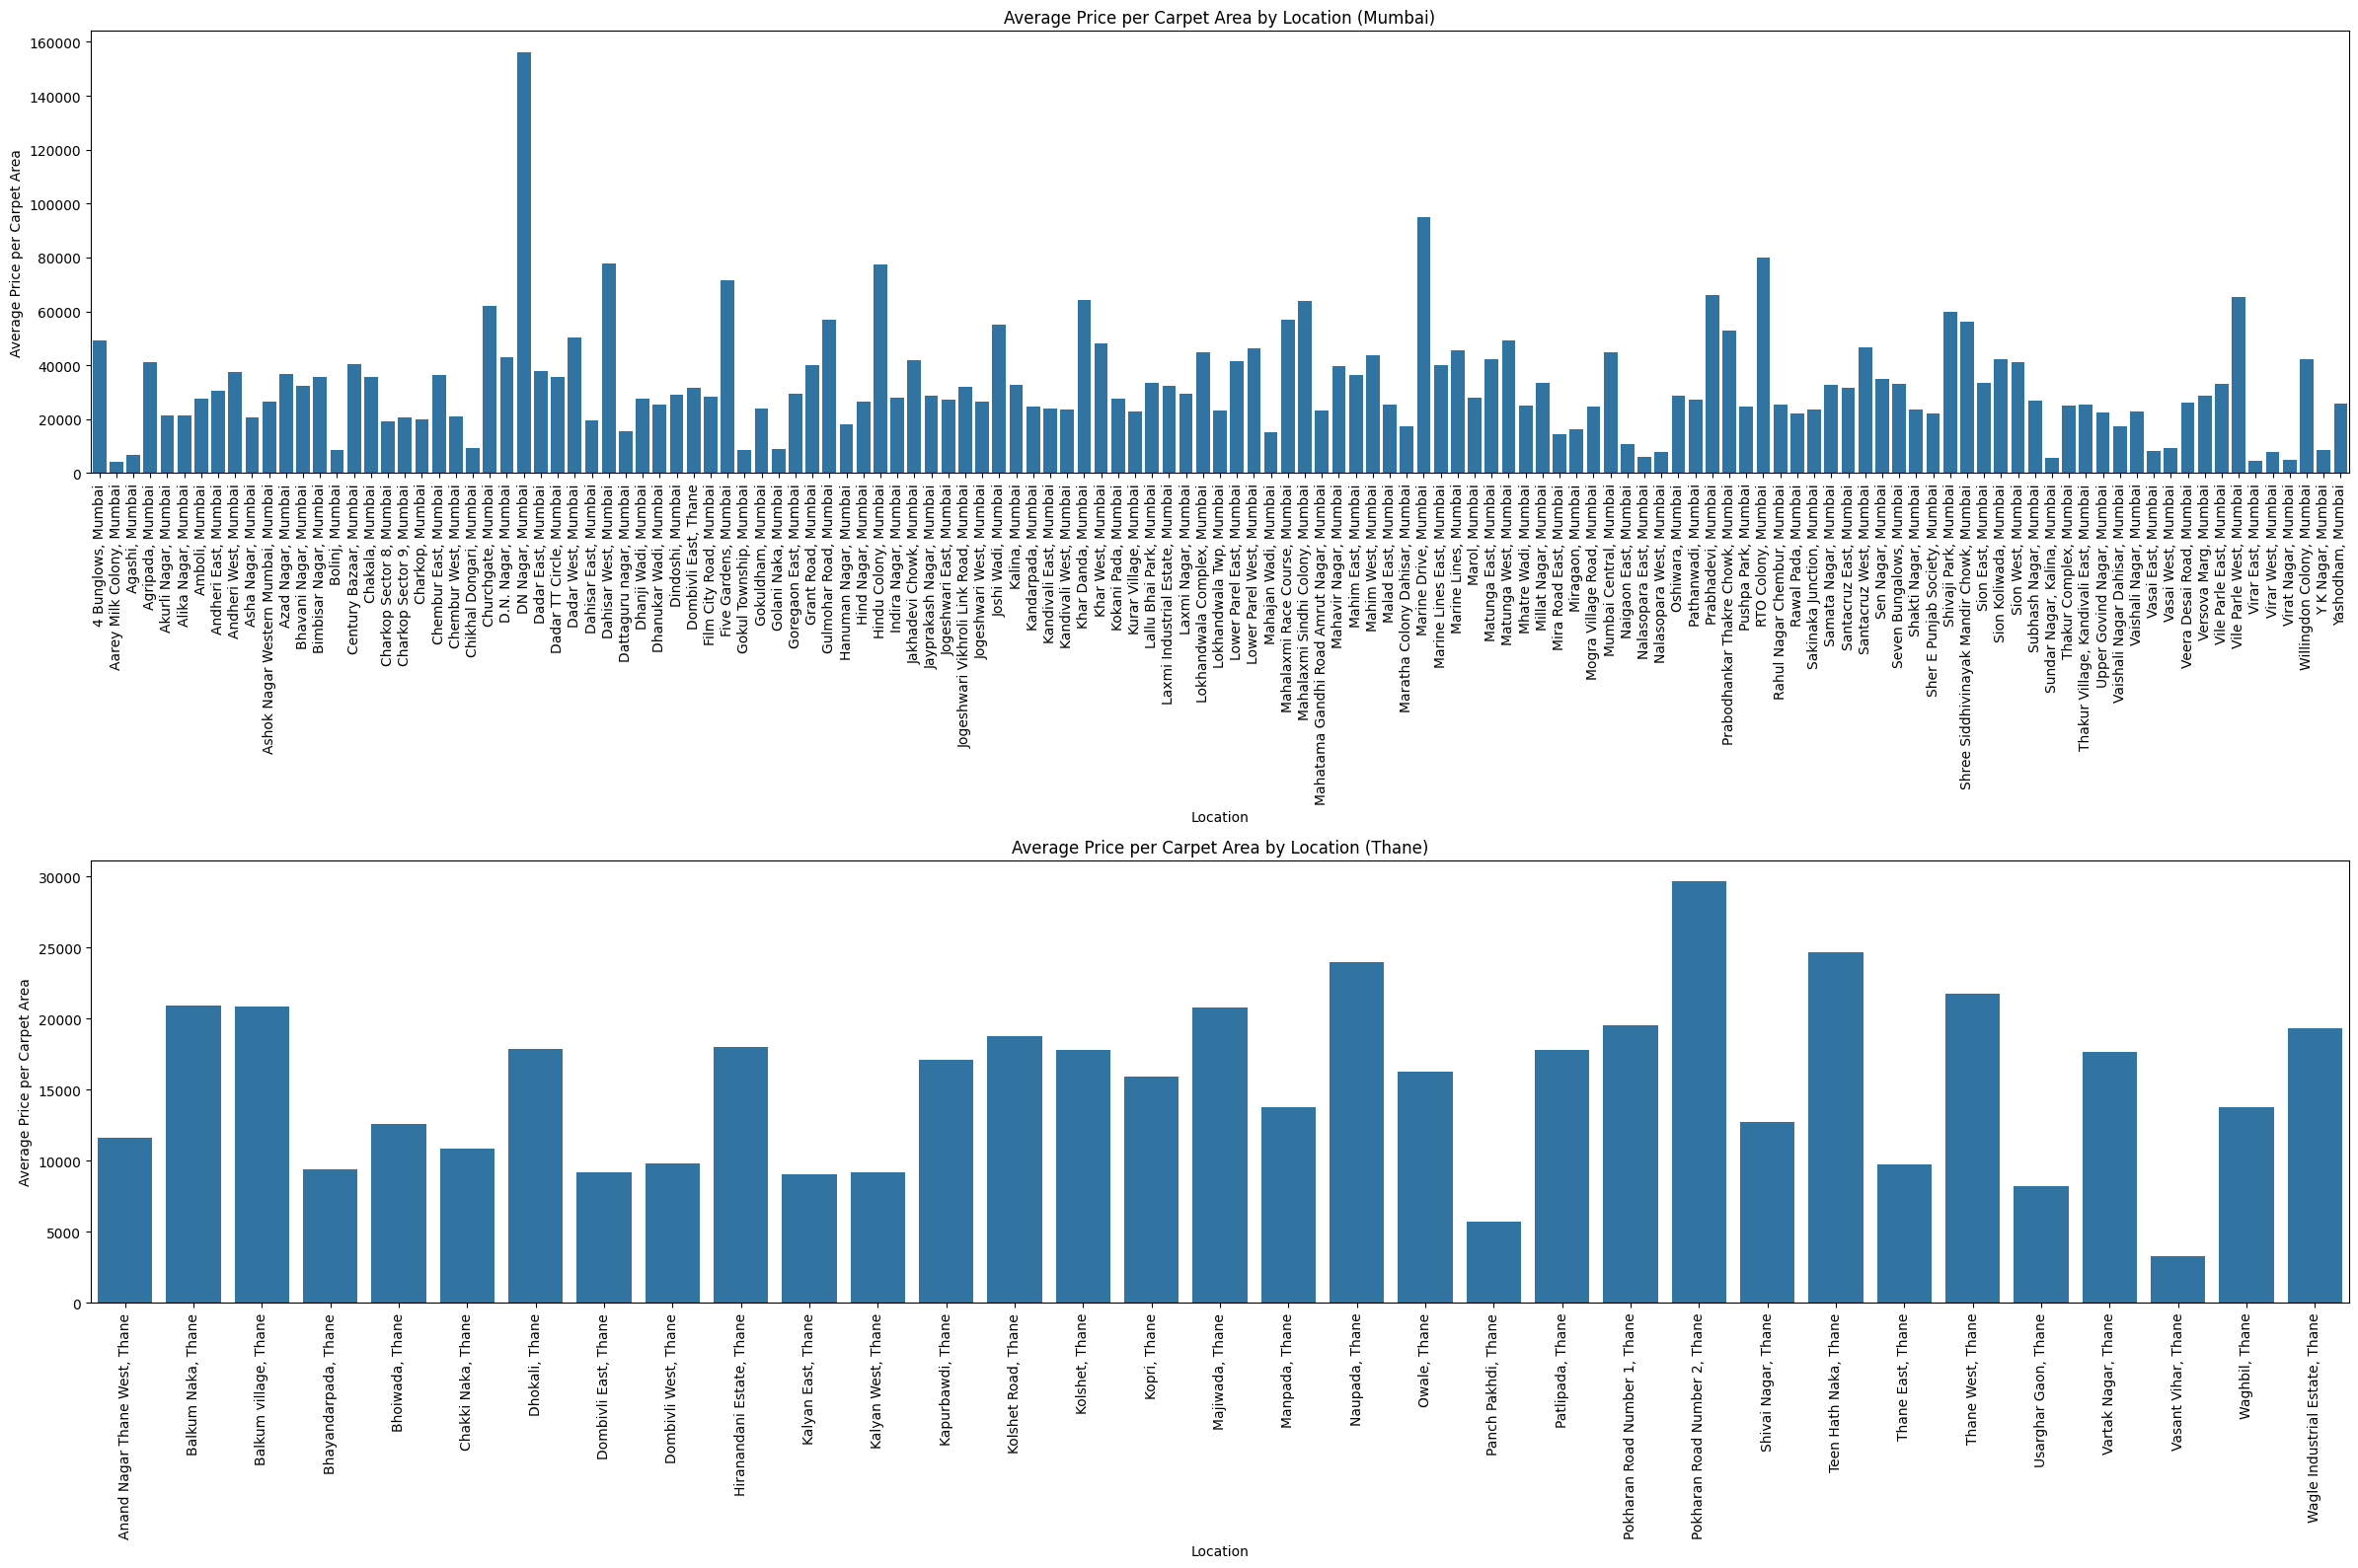

In [106]:
commercial_data['Location'] = commercial_data['Location'].astype(str)

data_mumbai = commercial_data[commercial_data['City'] == 'Mumbai']
data_thane = commercial_data[commercial_data['City'] == 'Thane']

data_mumbai['Price per Carpet Area'] = data_mumbai['Price'] / data_mumbai['Carpet Area']
data_thane['Price per Carpet Area'] = data_thane['Price'] / data_thane['Carpet Area']

avg_price_mumbai = data_mumbai.groupby('Location')['Price per Carpet Area'].mean().reset_index()
avg_price_thane = data_thane.groupby('Location')['Price per Carpet Area'].mean().reset_index()

plt.figure(figsize=(24, 16))

plt.subplot(2, 1, 1)
sns.barplot(data=avg_price_mumbai, x='Location', y='Price per Carpet Area')
plt.xlabel('Location')
plt.ylabel('Average Price per Carpet Area')
plt.title('Average Price per Carpet Area by Location (Mumbai)')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.barplot(data=avg_price_thane, x='Location', y='Price per Carpet Area')
plt.xlabel('Location')
plt.ylabel('Average Price per Carpet Area')
plt.title('Average Price per Carpet Area by Location (Thane)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


### Task 7

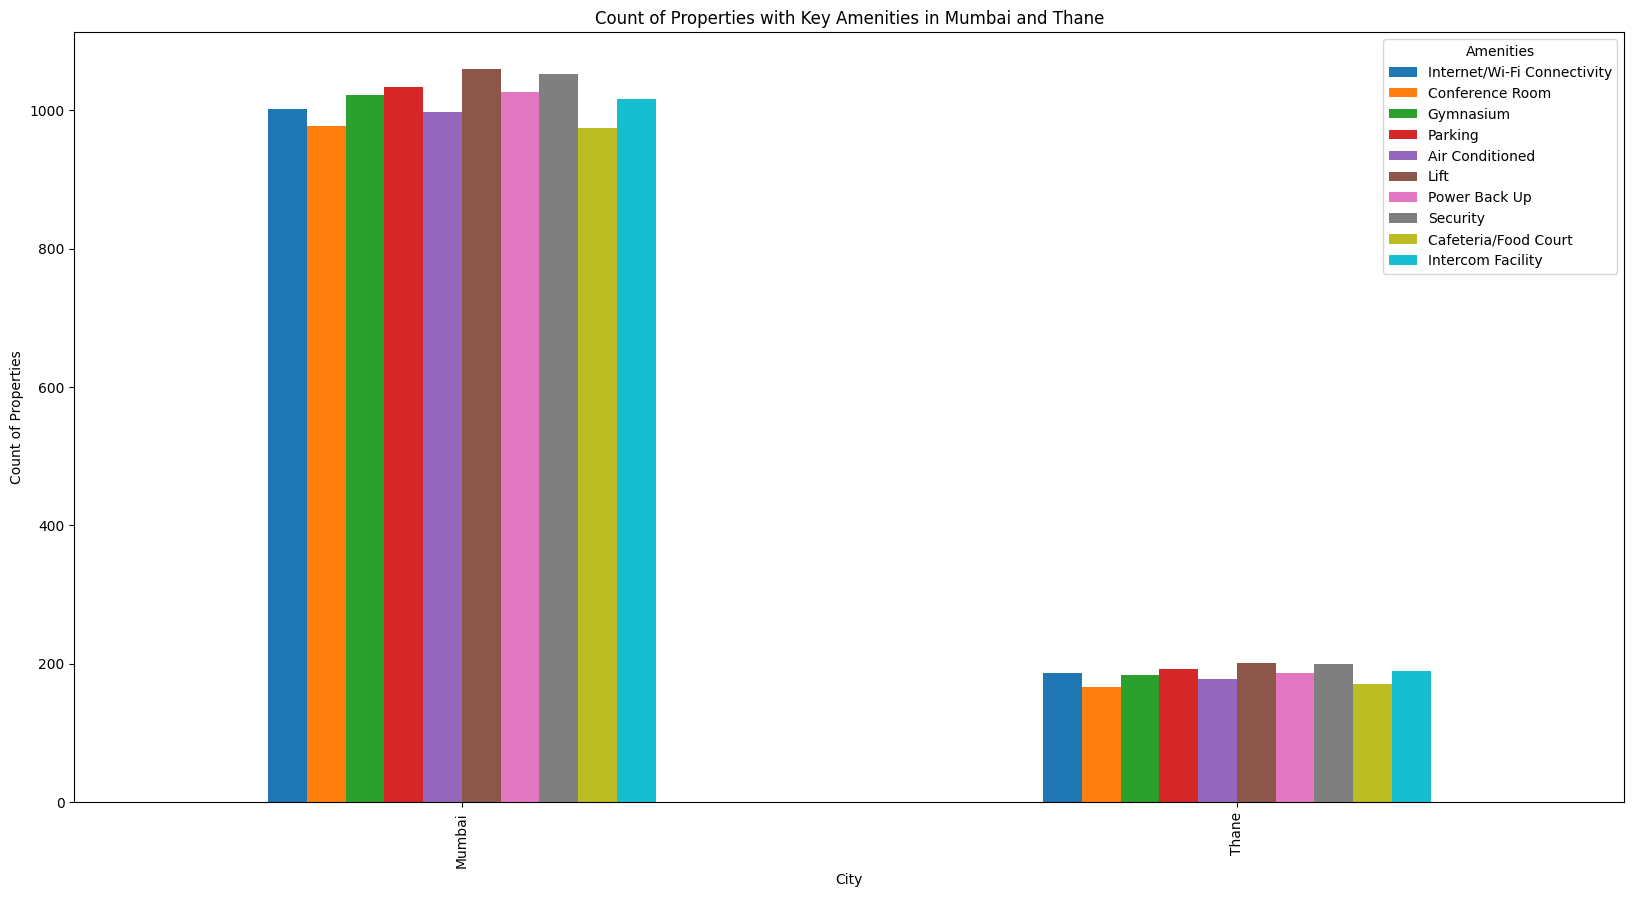

In [107]:
cities = df["City"].isin(["Mumbai", "Thane"])

amenities = [
    "Swimming Pool",
    "Gymnasium",
    "Club House",
    "Park",
    "Parking",
    "Security",
    "Private Terrace/Garden",
    "Air Conditioned",
    "Visitor Parking",
    "Intercom Facility",
    "Maintenance Staff",
    "Internet/Wi-Fi Connectivity",
    "Piped Gas",
    "Jogging and Strolling Track",
    "Smart Home",
    "Kids play area",
    "Library",
    "Puja Room",
    "Study",
    "Servant Room",
    "Store",
]
colors = [
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
    "#f6c5c1",
    "#c5f6c1",
    "#c1c5f6",
    "#f6f1c1",
    "#f1c5f6",
    "#c1f6f1",
    "#ff33cc",
    "#006600",
    "#6666ff",
    "#f1f6c5",
    "#f5a623",
]


amenities_summary.plot(kind="bar", figsize=(20, 10), color=colors)
plt.title("Count of Properties with Key Amenities in Mumbai and Thane")
plt.ylabel("Count of Properties")
plt.xlabel("City")
plt.legend(title="Amenities")
plt.show()

### Task 8


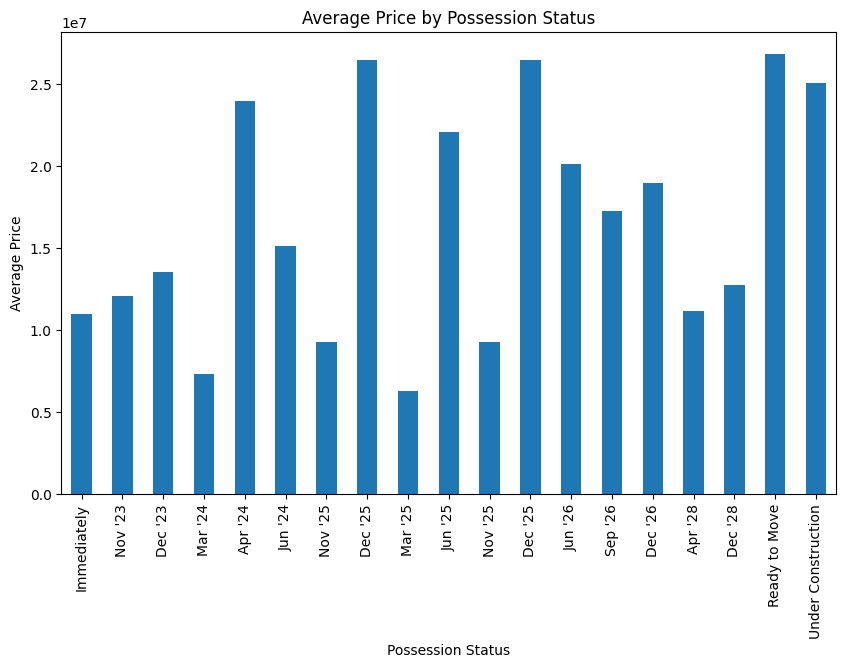

In [108]:
possession_status = df["Possession Status"].unique()
possession_status = possession_status[possession_status != "Select Date"]
possession_status
possession_status_summary = df.groupby("Possession Status")["Price"].mean()

possession_status_summary = possession_status_summary.reindex(
    [
        "Immediately",
        "Nov '23",
        "Dec '23",
        "Mar '24",
        "Apr '24",
        "Jun '24",
        "Nov '25",
        "Dec '25",
        "Mar '25",
        "Jun '25",
        "Nov '25",
        "Dec '25",
        "Jun '26",
        "Sep '26",
        "Dec '26",
        "Apr '28",
        "Dec '28",
        "Ready to Move",
        "Under Construction",
    ]
)


possession_status_summary.plot(kind="bar", figsize=(10, 6))
plt.title("Average Price by Possession Status")
plt.ylabel("Average Price")
plt.xlabel("Possession Status")
plt.show()

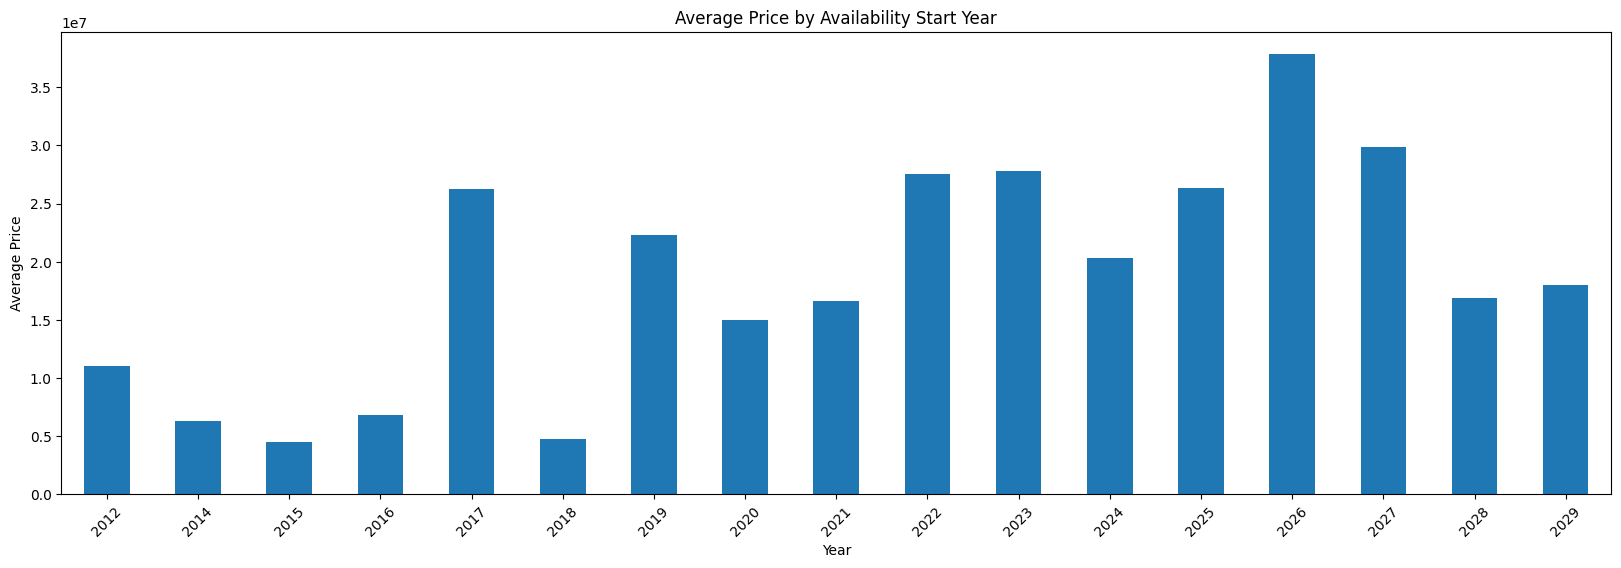

In [109]:
df["Year"] = df["Availability Starts From"].str.extract(r"(\d{2})$")
df["Year"] = df["Year"].astype(int) + 2000

availability_starts_from_summary = df.groupby("Year")["Price"].mean()

availability_starts_from_summary.plot(kind="bar", figsize=(20, 6))
plt.title("Average Price by Availability Start Year")
plt.ylabel("Average Price")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.show()

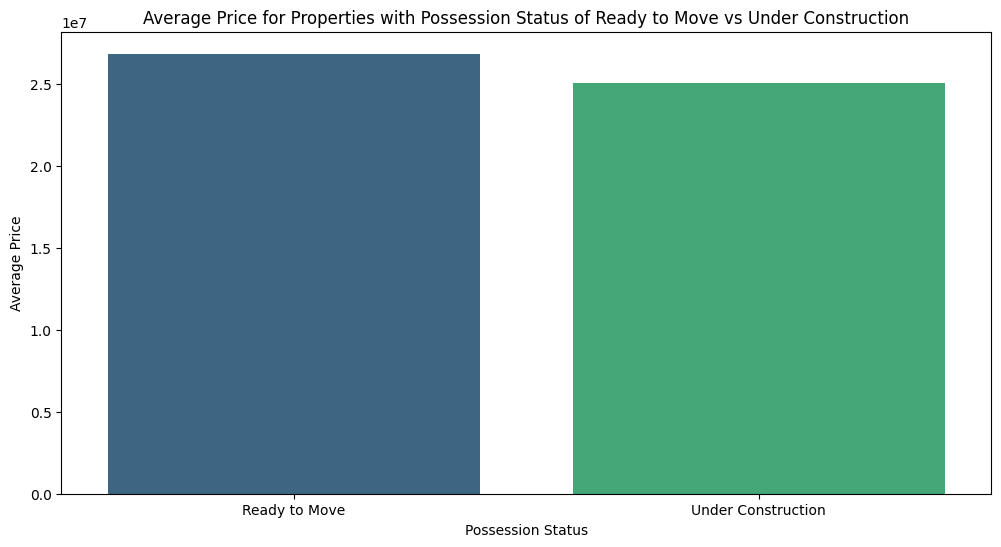

In [110]:
avg_price_status = df[df['Possession Status'].isin(['Ready to Move', 'Under Construction'])].groupby('Possession Status')['Price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_status, x='Possession Status', y='Price', palette='viridis')
plt.title('Average Price for Properties with Possession Status of Ready to Move vs Under Construction')
plt.ylabel('Average Price')
plt.xlabel('Possession Status')
plt.show()


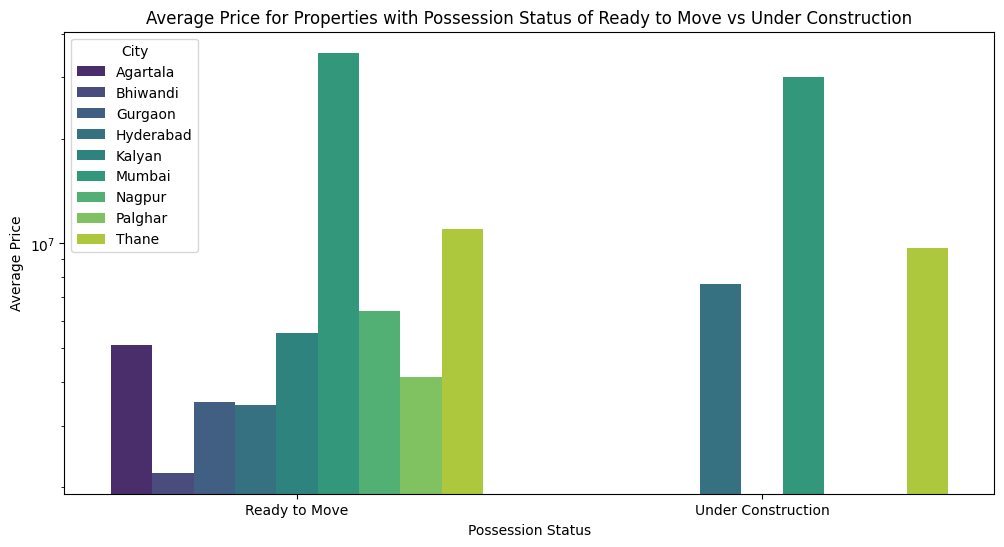

In [112]:
avg_price_city_status = df[df['Possession Status'].isin(['Ready to Move', 'Under Construction'])].groupby(['City', 'Possession Status'])['Price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_city_status, x='Possession Status', y='Price', hue='City', palette='viridis')
plt.title('Average Price for Properties with Possession Status of Ready to Move vs Under Construction')
plt.ylabel('Average Price')
plt.xlabel('Possession Status')
plt.yscale('log')
plt.show()


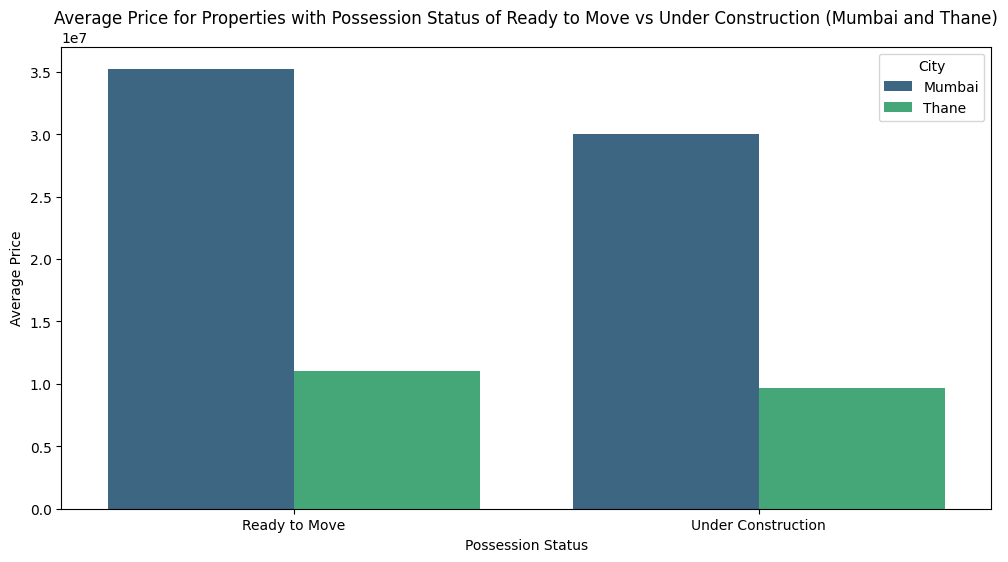

In [113]:
filtered_data = df[df['City'].isin(['Mumbai', 'Thane']) & df['Possession Status'].isin(['Ready to Move', 'Under Construction'])]

avg_price_city_status = filtered_data.groupby(['City', 'Possession Status'])['Price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_city_status, x='Possession Status', y='Price', hue='City', palette='viridis')
plt.title('Average Price for Properties with Possession Status of Ready to Move vs Under Construction (Mumbai and Thane)')
plt.ylabel('Average Price')
plt.xlabel('Possession Status')
plt.legend(title='City')
plt.show()


### Task 9
Analyze the impact of developers on property prices and features. Are there certain developers associated with higher-end properties or better amenities? 

In [114]:
developer_stats = df.groupby('Developer').agg({
    'Price': ['mean', 'median', 'std'],
    'Gymnasium': 'mean',
    'Swimming Pool': 'mean',
    'Club House': 'mean'
}).reset_index()

developer_stats.columns = ['Developer', 'Average Price', 'Median Price', 'Price Std Dev', 
                           'Gymnasium %', 'Swimming Pool %', 'Club House %']

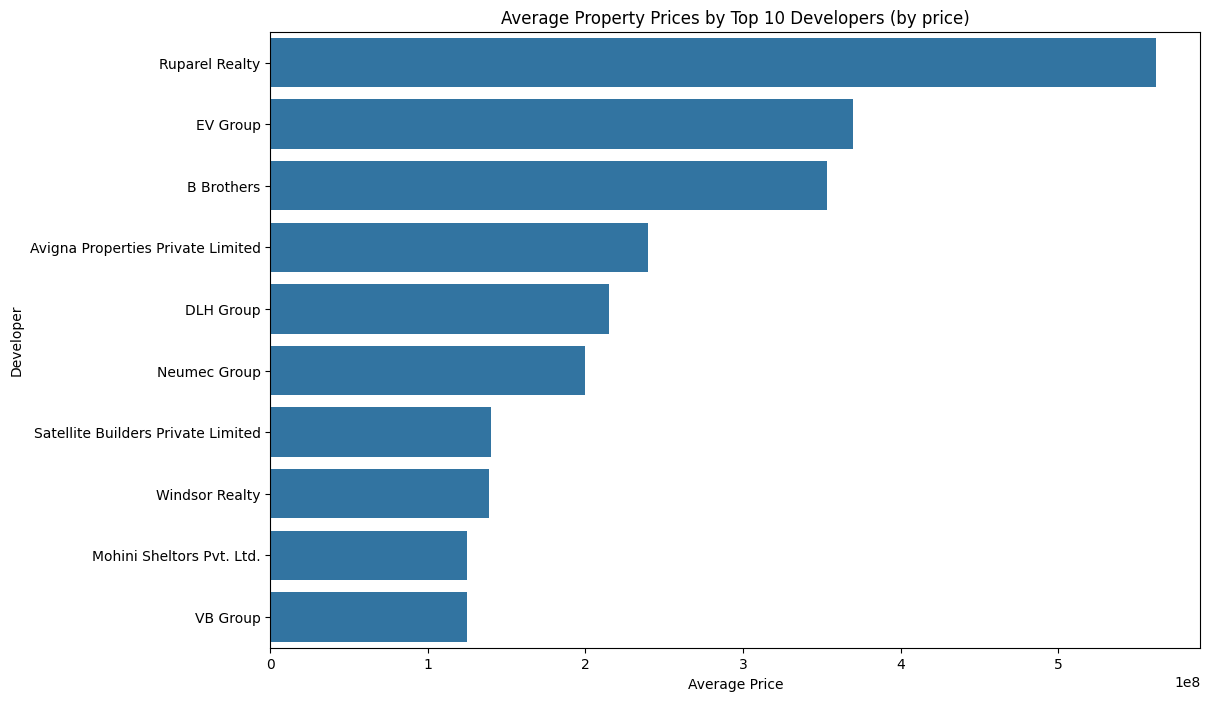

In [115]:
high_end_developers = developer_stats.sort_values('Average Price', ascending=False)
top_10_developers = high_end_developers.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Average Price', y='Developer', data=top_10_developers)
plt.title('Average Property Prices by Top 10 Developers (by price)')
plt.xlabel('Average Price')
plt.ylabel('Developer')
plt.show()



<Figure size 1200x800 with 0 Axes>

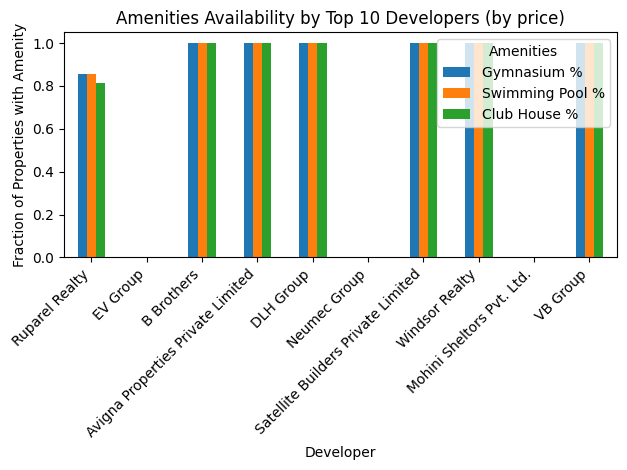

In [45]:
plt.figure(figsize=(12, 8))
top_10_developers.plot(x='Developer', y=['Gymnasium %', 'Swimming Pool %', 'Club House %'], kind='bar')
plt.title('Amenities Availability by Top 10 Developers (by price)')
plt.xlabel('Developer')
plt.ylabel('Fraction of Properties with Amenity')
plt.legend(title='Amenities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [116]:
developer_counts = df.groupby('Developer').size().reset_index(name='Property Count')

developer_stats = developer_stats.merge(developer_counts, on='Developer')

top_developers_by_properties = developer_stats.sort_values('Property Count', ascending=False)
top_10_developers_by_properties = top_developers_by_properties.head(10)


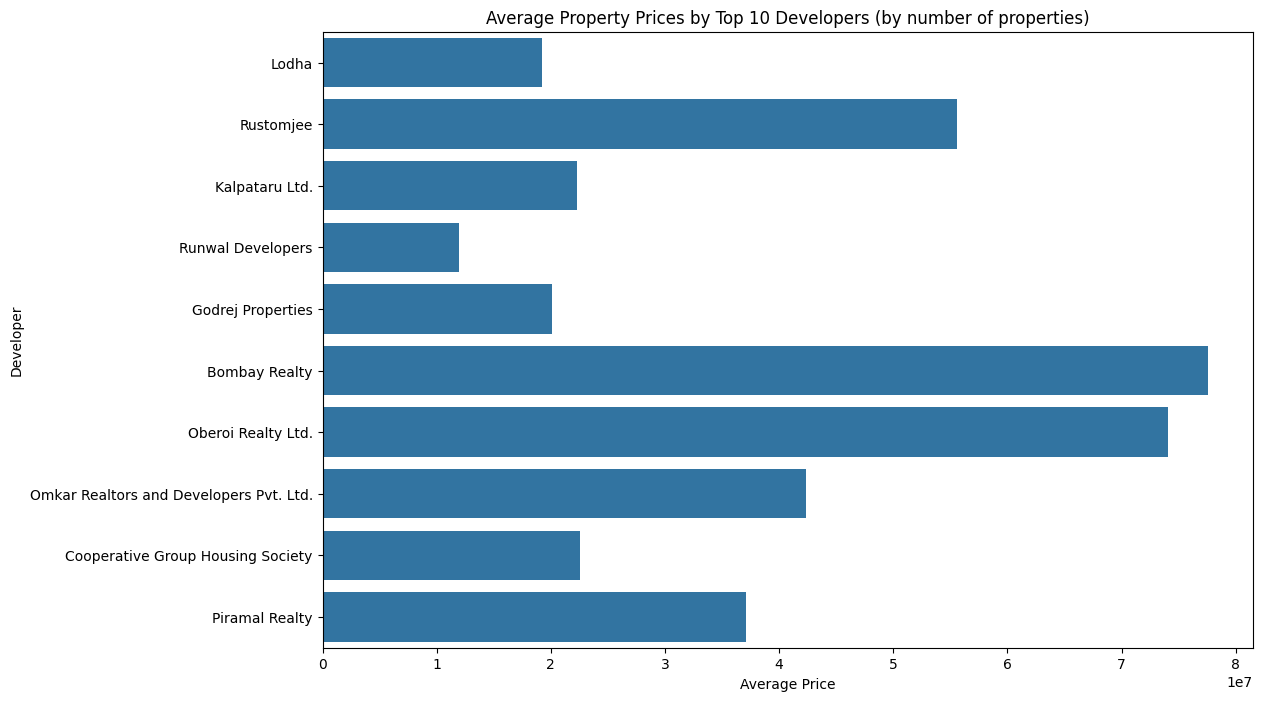

In [117]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Average Price', y='Developer', data=top_10_developers_by_properties)
plt.title('Average Property Prices by Top 10 Developers (by number of properties)')
plt.xlabel('Average Price')
plt.ylabel('Developer')
plt.show()


<Figure size 1200x800 with 0 Axes>

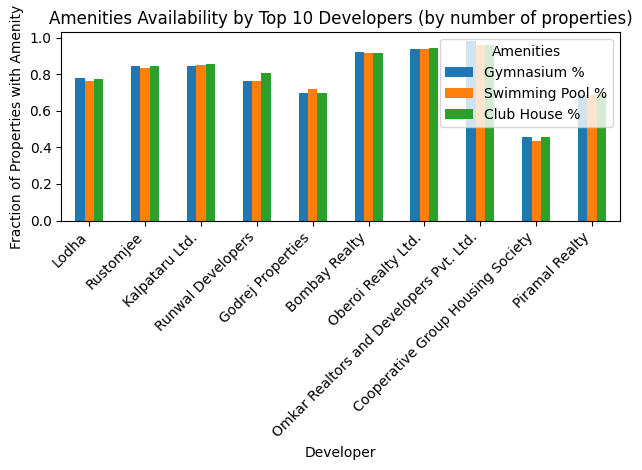

In [118]:
plt.figure(figsize=(12, 8))
top_10_developers_by_properties.plot(x='Developer', y=['Gymnasium %', 'Swimming Pool %', 'Club House %'], kind='bar')
plt.title('Amenities Availability by Top 10 Developers (by number of properties)')
plt.xlabel('Developer')
plt.ylabel('Fraction of Properties with Amenity')
plt.legend(title='Amenities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


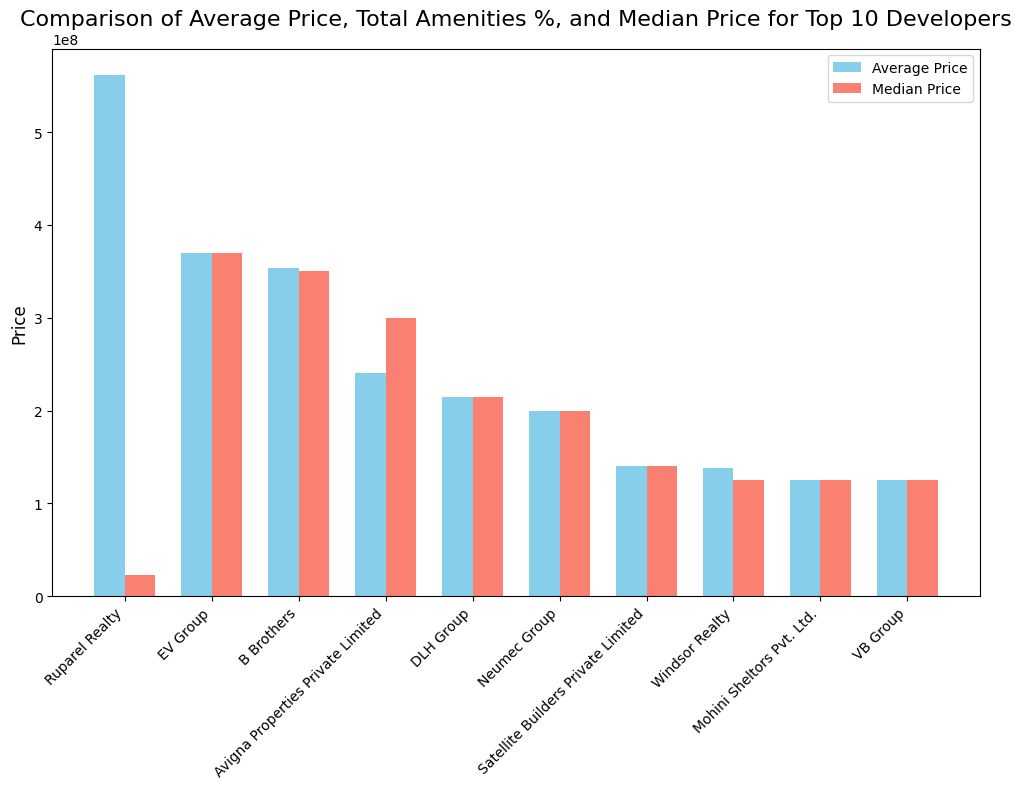

In [120]:
top_10_developers["Total Amenities %"] = (
    top_10_developers["Gymnasium %"]
    + top_10_developers["Swimming Pool %"]
    + top_10_developers["Club House %"]
)
top_10_developers_sorted = top_10_developers.sort_values(
    "Average Price", ascending=False
)

fig, ax1 = plt.subplots(figsize=(10, 8))
width = 0.35

x = np.arange(len(top_10_developers_sorted))

rects1 = ax1.bar(
    x - width / 2,
    top_10_developers_sorted["Average Price"],
    width,
    label="Average Price",
    color="skyblue",
)

rects3 = ax1.bar(
    x + width / 2,
    top_10_developers_sorted["Median Price"],
    width,
    label="Median Price",
    color="salmon",
)

ax1.set_ylabel("Price", fontsize=12)

ax1.set_title(
    "Comparison of Average Price, Total Amenities %, and Median Price for Top 10 Developers",
    fontsize=16,
)
ax1.set_xticks(x)
ax1.set_xticklabels(top_10_developers_sorted["Developer"], rotation=45, ha="right")
ax1.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax1.annotate(
            f"{height:.0f}",
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
            rotation=90,
        )


plt.tight_layout()
plt.show()

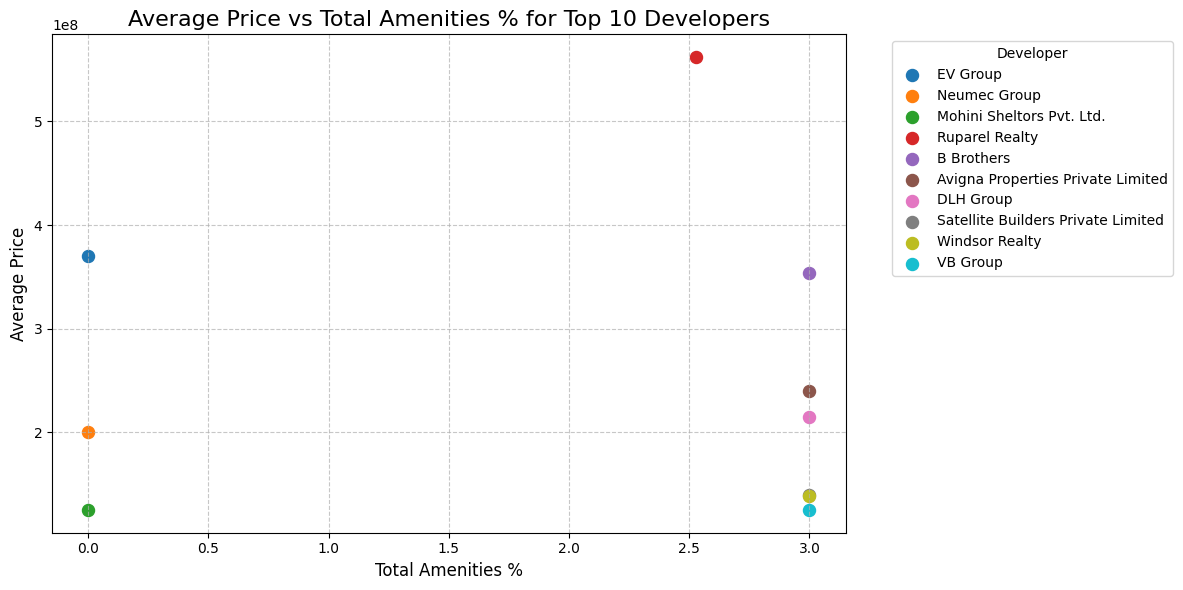

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

top_10_developers['Total Amenities %'] = (
    top_10_developers['Gymnasium %'] + 
    top_10_developers['Swimming Pool %'] + 
    top_10_developers['Club House %']
)

top_10_developers_sorted = top_10_developers.sort_values('Total Amenities %')

plt.figure(figsize=(12, 6))

x = top_10_developers_sorted['Total Amenities %'].to_numpy()
y = top_10_developers_sorted['Average Price'].to_numpy()

num_developers = len(top_10_developers_sorted)
cmap = cm.get_cmap('tab10', num_developers)

for i, (index, row) in enumerate(top_10_developers_sorted.iterrows()):
    plt.scatter(row['Total Amenities %'], row['Average Price'], s=75, color=cmap(i / num_developers), label=row['Developer'])

plt.title('Average Price vs Total Amenities % for Top 10 Developers', fontsize=16)
plt.xlabel('Total Amenities %', fontsize=12)
plt.ylabel('Average Price', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(title='Developer', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


---